In [1]:
import matplotlib.pyplot as plt
import statistics as st
import pandas as pd
import seaborn as sns
import numpy as np

#### Abstract
Our work shows that EpoR signaling increases erythroblast cell size at every stage of erythroid terminal differentiation, leading to the formation of larger reticulocytes. Two human intervention studies in which Epo is administered to healthy volunteers show an increase in MCV which could not be attributed to reticulocytosis, suggesting that Epo/EpoR signaling also increases red cell (RC) size in human erythropoiesis. However, an alternative explanation is that the observed increase in MCV is the result of skewing of the circulating RC pool in favor of younger, larger RCs, since RCs loose volume with aging. Here we consider this alternative possibility quantitatively. We simulate changes in MCV that would be predicted based on published parameters for the rate of volume loss during reticulocyte maturation and RC aging, including the early release of immature reticulocytes into the circulation in response to high Epo. Our simulation suggests that these factors can only account for 30 to 50% of the overall increase in MCV observed in the human studies. Therefore, additional factors, including EpoR signaling, contribute to the observed increase in cell size in response to Epo. 


## 1.  Set up the relationships between erythropoietic rate, reticulocyte size and maturation time in the circulation 

### Incorportate changes in reticulocyte circulation time and size due to earlier release in response to high Epo

#### 1. Retic volume: Brugnara 1998: in the basal state, MCVr is 24% larger than mature red cell. Increases with stress; extreme stress (aplastic anemia, phenylhydrazine in animals) can generate retics that are double the size of mature cells. However, in Brugnara et al. 1994, 1200 units/Kg over 10 days resulted in only a 20% further increase in MCVr

#### 2. Retic maturation time in circulation: about 1 day in basal state, increasing up to 3 days in extreme stress. This can mislead re. the actual increase in erythropoietic rate. Maturation time increases linearly with stress.

#### 4. Maturation time: shown to increase linearly with ery rate. This suggests an increase to 1.2 days for a doubling in ery rate; therefore here will assume no change in maturation time ( this will tend to exaggerate ery rate since all of the retic count increase will be presumed to be directly proportional to the increase in ery rate). 

In [2]:
"""assuming a maximal, ten fold (f) increase in erythropoietic rate  (f = 10) results in a two fold increase 
in mean reticulocyte volume (MCVr), and that the relationship between erythropoietic rate and the increase in MCVr is 
linear, it is goverend by the linear equation v = (f+8)/9
The MCVr list below calculates corresponding increase in retic volumes for each fold increase in 
erythropoietic rate. This shows a 22% increase in volume for a 3 fold increase in ery rate, 
and only an 11% increase for a 2 fold increase in ery rate.
""" 
fold_increase = [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]
fVr_list = [] # initiate list of fold increase in Vr (MCVr == Vr)

for f in fold_increase:
    v= (f + 8)/9
    fVr_list.append(v)
fVr_list = [round(v, 3) for v in fVr_list]

print(fVr_list)
    

[1.0, 1.028, 1.056, 1.083, 1.111, 1.222, 1.333, 1.444, 2.0]


In [3]:
'''similarly, assuming a linear increase in maturation times, from 1 day in basal state, to 3 days in f = 10, 
maturation time increases from 1 day to 1.22 days for a doubling in erythropoietic rate. '''
fold_increase = [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]
Mat = [] # initiate list of maturation times

for f in fold_increase:
    m = (2*f + 7)/9
    Mat.append(m)
Mat = [round(m, 3) for m in Mat]
m_list = [int(round(i, 0)) for i in Mat]
print(m_list, Mat)


[1, 1, 1, 1, 1, 1, 2, 2, 3] [1.0, 1.056, 1.111, 1.167, 1.222, 1.444, 1.667, 1.889, 3.0]


#### Bundle up the relationships between ery rate and retic values in a 'stress dictionary', plot the key relationships

In [4]:
#Bundle up all three lists in a dictionary. Key = fold increase in ery rate; 
# value = tuple of (fVr, m, Mat, index) m= days as integers, Mat = days of maturation as floats
stressD = {}
for i, f in enumerate(fold_increase):
    stressD[f]= fVr_list[i], m_list[i], Mat[i], i
print(stressD)
                                     

{1: (1.0, 1, 1.0, 0), 1.25: (1.028, 1, 1.056, 1), 1.5: (1.056, 1, 1.111, 2), 1.75: (1.083, 1, 1.167, 3), 2: (1.111, 1, 1.222, 4), 3: (1.222, 1, 1.444, 5), 4: (1.333, 2, 1.667, 6), 5: (1.444, 2, 1.889, 7), 10: (2.0, 3, 3.0, 8)}


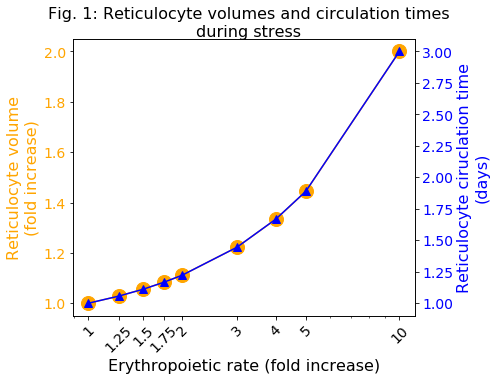

In [5]:
fig, ax = plt.subplots(figsize = (7,5))
#fig, ax = plt.subplots(1,2, figsize = (4,5))

x = []
y1 = []
y2 = []
xlabels = []

for f, v in stressD.items():
    x.append(f)
    y1.append(v[0])
    y2.append(v[2])
    xlabels.append(str(f))

ax.plot(x, y1, marker = 'o', color = 'orange', markersize = 14)
plt.xscale('log')
#ax.set_xticks(x)
#ax.set_xticklabels(xlabels)
plt.xticks(ticks = x, labels=xlabels, fontsize = 14, rotation = 45)
plt.yticks(color = 'orange', fontsize = 14)
ax.set_xlabel('Erythropoietic rate (fold increase)', fontsize = 16)
ax.set_ylabel('Reticulocyte volume\n(fold increase)', multialignment='center', color = 'orange', fontsize = 16)
ax2=ax.twinx()
ax2.plot(x, y2, marker = '^',  color = 'blue', markersize = 8)
ax2.set_ylabel('Reticulocyte ciruclation time\n(days)', 
               multialignment='center', color = 'blue', fontsize = 16)
plt.yticks(color = 'blue', fontsize = 14)
#sns.set_context("paper")
suptitle = plt.suptitle('Fig. 1: Reticulocyte volumes and circulation times\nduring stress', multialignment='center',
            fontsize = 16, y = 1.05)

fig.tight_layout()
plt.savefig("Figures/RClife95/stressD.pdf", bbox_extra_artists=(suptitle,), bbox_inches="tight")


## 2. Calculate distribution of RC volumes with age 

 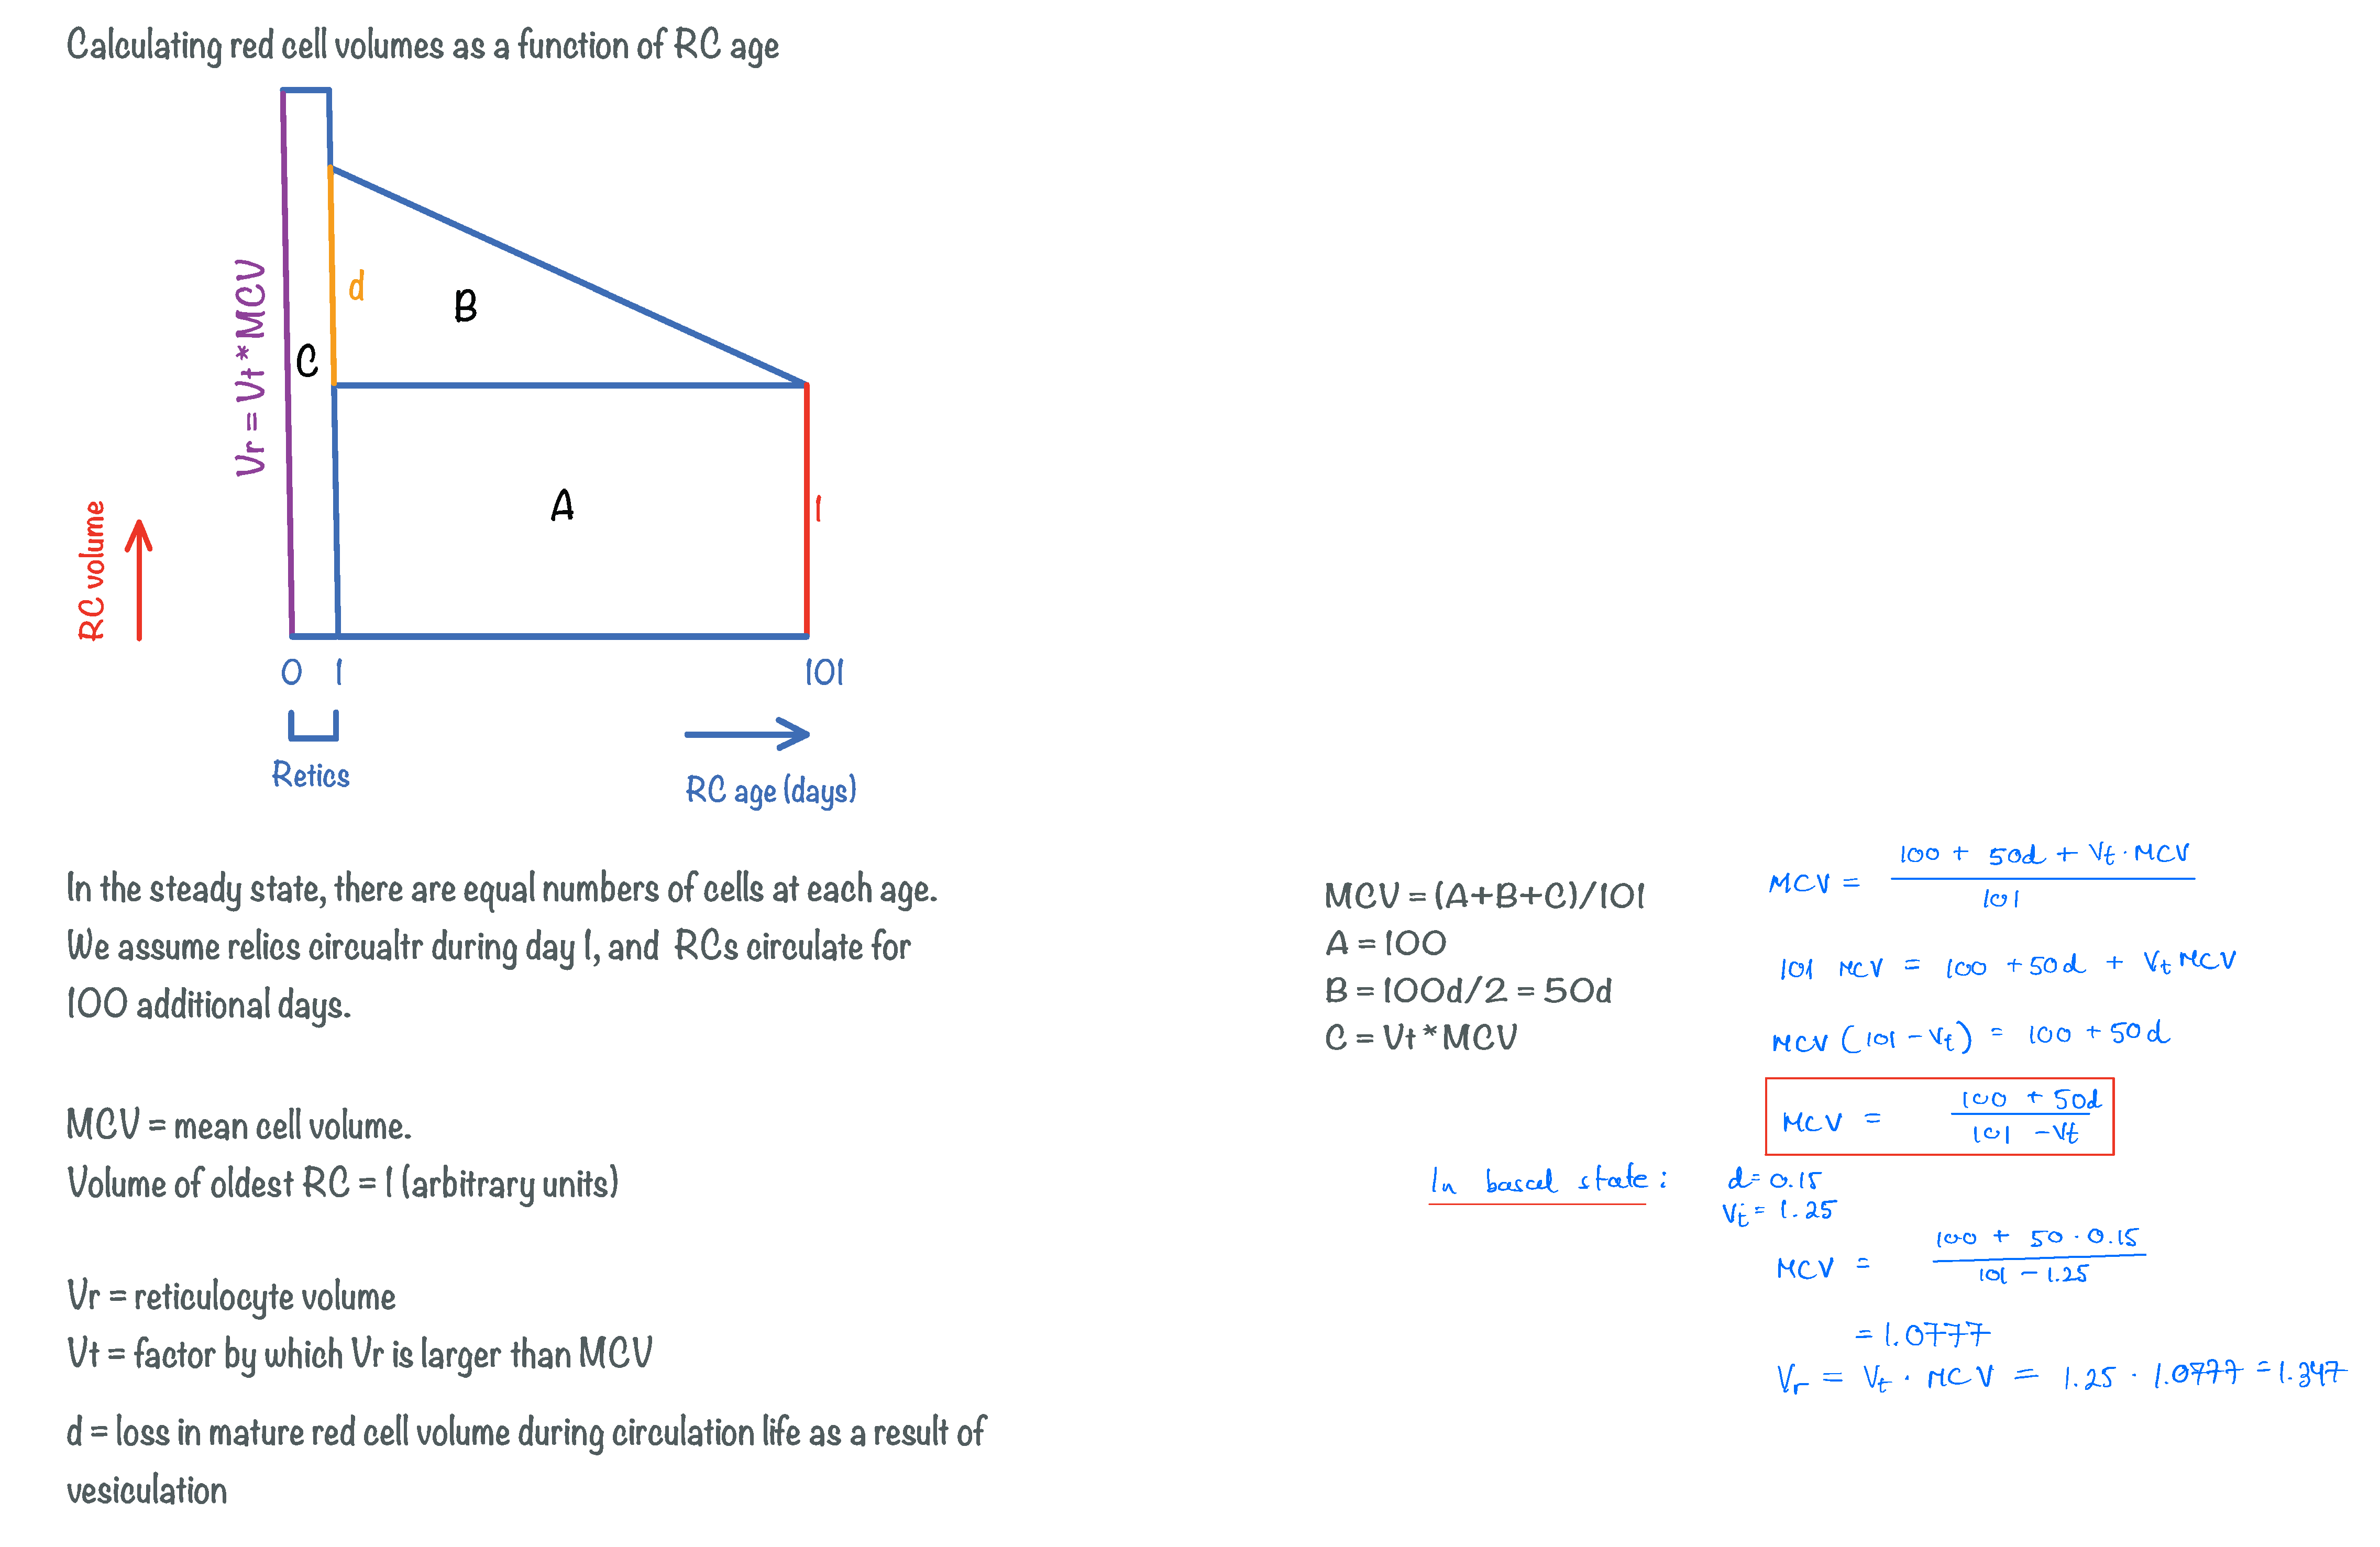

In [6]:
def get_vol(d=0.2, m=1, Vt=1.25, fVr=1, RClife = 100):
    '''Calculate distribution of cell volumes with RC age
    Input:
    d (float) = difference in size between newest and oldest mature RCs (as fraction of newest, RC lifespan=100 days) 
    m (int) = days of reticulocyte maturation in cicrulation
    Vt (float)= factor by which retic volum (Vr) is larger than MCV during basal state
    fVr (float)= fold increase in reticulocyte volume as a result of Epo stimulation over its basal state value
    RClife = red cell lifespan (assuming same rate of volume loss as in red cell span of 100 days)
    
    Output: A list, elements are cell volumes, index is age in days
    NB this function rounds 'm' to whole days, which is less accurate for MCV calculations, but easier for some 
    representations in plots. '''

    #corrected 'd': (required to convert % loss in RC thru vesiculation into the 'd' in the 
    #figure above)
    d = 1/(1-d) - 1
    
    
    MCV = (100 + 50*d)/(101 - Vt)
    Vr = Vt * MCV
    s = (Vr - (1+d)) # rate of loss of reticulocye volume in the 1 day of maturation in the circulation

    V_basal = []  # initiate a list of cell volume for RCs at each age

    # Generate a list of cell volumes for each cell age, where list index = age of cells, from 0 to 100
    
    for i in range(2):
        V_basal.append(Vr - s*i)
    for i in range(1,101):
        V_basal.append((1+d)- d*i/100)
        
    if RClife != 100:
        p = 100 - RClife
        l = len(V_basal)
        q = l-p
        V_basal = V_basal[:q]

    MCV_basal = st.mean(V_basal)
    V_basal = [v/MCV_basal for v in V_basal]  # express volumes of Retics and RCs relative to MCV in basal state
    
    V_Epo = [] # Initiate volume series
    V_Epo_1day = [] # initiate a series where all retic volume change in one day, 
    #to be multiplied later by a more accurate m (Mat)
    
    
    # Calculate change in Vr for Epo stimulation if fVr>1:
    if fVr==1:
        V_Epo = V_basal[:]
    elif fVr>1:
        Vr = fVr * V_basal[0] # new initial retic volume
        s = (Vr- V_basal[1])/m # rate of loss of reticulocye volume in the m days of maturation in the circulation
        
        for i in range(m+1):
            V_Epo.append(Vr - s*i) # genreate elements corresponding to retics
        V_Epo.extend(V_basal[2:]) # add non-retic elements from V_basal
         
       
        V_Epo_1day.append(Vr) # genreate element corresponding to retics
        
        V_Epo_1day.extend(V_basal[1:])
    
    return V_Epo


In [7]:
st.mean(get_vol(d=0.2, m=1, Vt=1.25, fVr=1, RClife = 95))

1.0

In [8]:
def get_vol_1day(d=0.2, Vt=1.25, fVr=1, RClife = 100):
    '''Calculate distribution of cell volumes with RC age; 
    All retics are accounted for in day 1, but multiplied in the next function (plot_MCV) by the maturation 
    factor Mat, to account for longer maturation times in the circulation.
    Input:
    d (float) = difference in size between newest and oldest mature RCs (as fraction of newest) 
    Vt (float)= factor by which retic volum (Vr) is larger than MCV during basal state
    fVr (float)= fold increase in reticulocyte volume as a result of Epo stimulation over its basal state value
    
    Output: A list, elements are cell volumes, index is age in days
    V_Epo: All retics are entered in one day, will be multiplied later by 'Mat',more accurate for MCV calc.
    '''
    #corrected 'd': (required to convert % loss in RC thru vesiculation into the 'd' in the 
    #figure above)
    d = 1/(1-d) - 1
    
    
    MCV = (100 + 50*d)/(101 - Vt)
    Vr = Vt * MCV
    s = (Vr - (1+d)) # rate of loss of reticulocye volume in the 1 day of maturation in the circulation

    V_basal = []  # initiate a list of cell volume for RCs at each age

    # Generate a list of cell volumes for each cell age, where list index = age of cells, from 0 to 100
    
    for i in range(2):
        V_basal.append(Vr - s*i)
    for i in range(1,101):
        V_basal.append((1+d)- d*i/100)
        
    if RClife != 100:
        p = 100 - RClife
        l = len(V_basal)
        q = l-p
        V_basal = V_basal[:q]

    MCV_basal = st.mean(V_basal)
    V_basal = [v/MCV_basal for v in V_basal]  # express volumes of Retics and RCs relative to MCV in basal state
    
    V_Epo = [] # Initiate volume series
    
    #to be multiplied later by a more accurate m (Mat)
    
    
    # Calculate change in Vr for Epo stimulation if fVr>1:
    if fVr==1:
        V_Epo = V_basal[:]
    elif fVr>1:
        Vr = fVr * V_basal[0] # new initial retic volume
        
        V_Epo.append(Vr) # genreate element corresponding to retics
        V_Epo.extend(V_basal[1:]) # add non-retic elements from V_basal
    
    return V_Epo


In [9]:
st.mean(get_vol_1day(d=0.2, Vt=1.25, fVr=1, RClife = 95))

1.0

#### Calculating total loss in RC volumes with age for different values of 'd'

In [10]:
dDict = {}
for d in np.arange(0.15, 0.2, 0.01):
    V = get_vol(d = d, fVr = 1, m = 1, RClife = 95)
    dDict[d]=((V[0]-V[-1])/V[0],  (V[0]-V[1])/V[0])
dDict
   
total_loss = [t[0] for t in dDict.values()]
retic_loss = [t[1] for t in dDict.values()]
d = (np.arange(0.15, 0.2, 0.01)).tolist()
d

[0.15,
 0.16,
 0.17,
 0.18000000000000002,
 0.19000000000000003,
 0.20000000000000004]

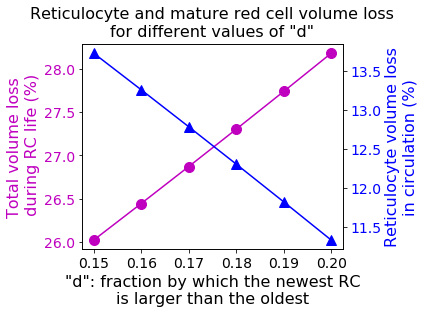

In [11]:
fig, ax= plt.subplots()
total_loss = [t[0]*100 for t in dDict.values()]
retic_loss = [t[1]*100 for t in dDict.values()]

ax.plot(d, total_loss, marker = 'o', color = 'm', markersize = 10)
ax.set_xlabel('"d": fraction by which the newest RC\nis larger than the oldest', fontsize = 16)
ax.set_ylabel('Total volume loss\n during RC life (%)', multialignment='center', color = 'm', fontsize = 16)
plt.yticks(color = 'm', fontsize = 14)
plt.xticks(d, fontsize = 14)
ax2=ax.twinx()
ax2.plot(d, retic_loss, marker = '^',  color = 'blue', markersize = 10)
ax2.set_ylabel('Reticulocyte volume loss\nin circulation (%)', 
               multialignment='center', color = 'blue', fontsize = 16)
plt.yticks(color = 'blue', fontsize = 14)
plt.xticks(d, fontsize = 14)


suptitle = plt.suptitle('Reticulocyte and mature red cell volume loss\nfor different values of "d"', 
                        multialignment='center',fontsize = 16, y = 1.08)

fig.tight_layout()
plt.savefig("Figures/RClife95/d_values.pdf", bbox_extra_artists=(suptitle,), bbox_inches="tight")


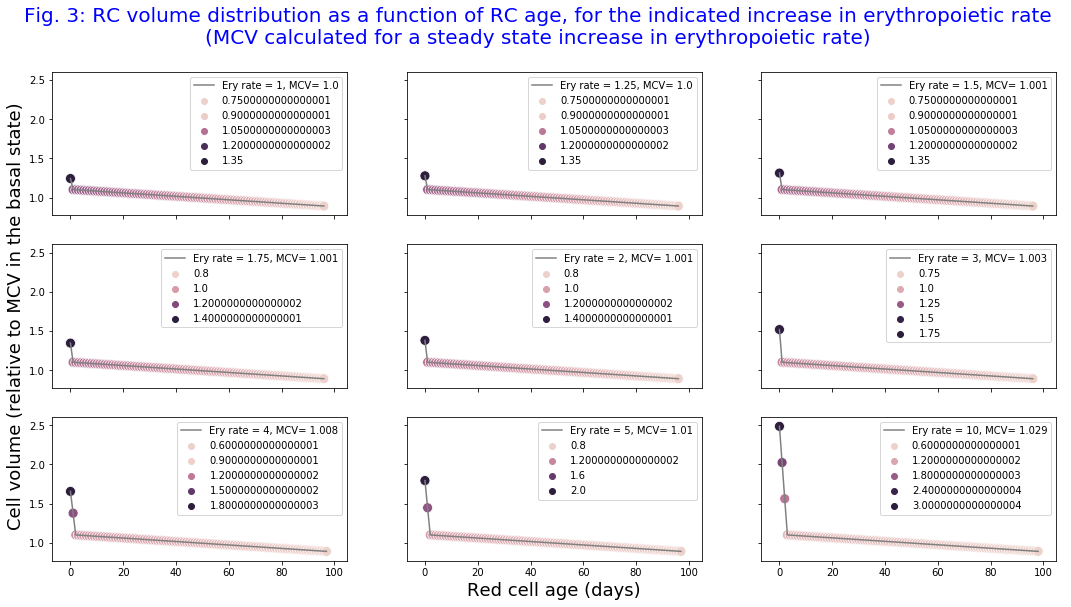

In [12]:
#stressD values are tuples of (fVr, m, Mat, index)

fig, axes = plt.subplots(3,3, figsize=(18, 9), sharex = True,sharey=True)

for k, v in stressD.items():
    V = get_vol(fVr = v[0], m = v[1], RClife = 95) # get the V_Epo list using the get_vol() function
    x = range(len(V))
    i = v[3]
    sns.scatterplot(x, V, hue = V, s= 100, ax = axes[i//3, i%3])
    
    sns.lineplot(x, V, color = 'grey',ax = axes[i//3, i%3], label = 'Ery rate = '+ str(k)+
                 ', MCV= '+ str(round(st.mean(V), 3)))
    
    
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Cell volume (relative to MCV in the basal state)', fontsize = 18)
plt.xlabel('Red cell age (days)',fontsize = 18)
plt.suptitle('Fig. 3: RC volume distribution as a function of RC age, for the indicated increase in erythropoietic rate\n(MCV calculated for a steady state increase in erythropoietic rate)', 
             color = 'blue', fontsize = 20)
#sns.set_context('talk')
#fig.tight_layout()
fig.savefig('Figures/RClife95/RC distribution with age for varying ery rates.pdf')


Text(0.5, 1.0, 'RC volume distribution with RC age, for the indicated increase in erythropoietic rate\n(MCV calculated for a steady state increase in erythropoietic rate)')

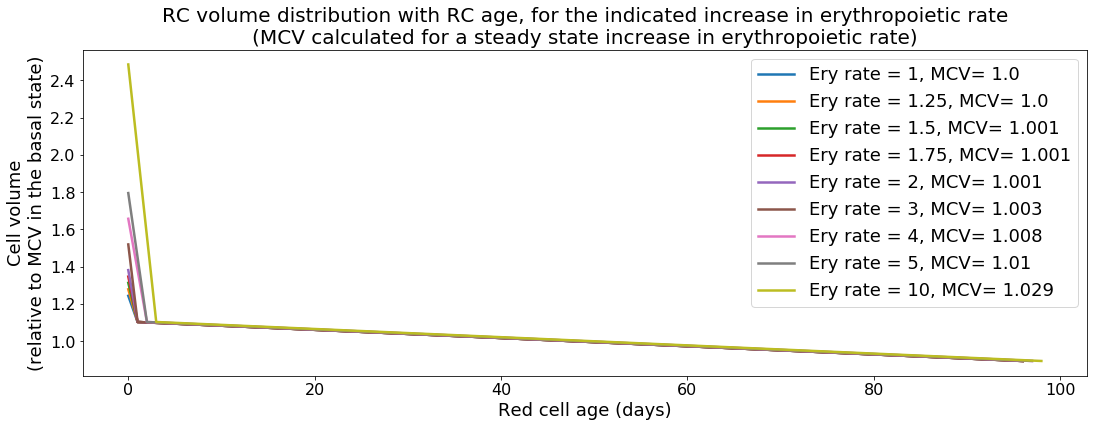

In [13]:
#stressD values are tuples of (fVr, m, Mat, index)

fig, axes = plt.subplots(figsize = (18, 6))

for k, v in stressD.items():
    V = get_vol(fVr = v[0], m = v[1], RClife = 95) # get the V_Epo list using the get_vol() function
    x = range(len(V))
    sns.lineplot(x, V, label = 'Ery rate = '+ str(k)+
                 ', MCV= '+ str(round(st.mean(V), 3)), linewidth = 2.5)

    #plt.ylabel('Cell volume', fontsize = 14)
    #plt.xlabel('Red cell age (days)',fontsize = 14)
plt.legend(fontsize = 18)

plt.ylabel('Cell volume\n(relative to MCV in the basal state)', fontsize = 18)
plt.xlabel('Red cell age (days)',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('RC volume distribution with RC age, for the indicated increase in erythropoietic rate\n(MCV calculated for a steady state increase in erythropoietic rate)', 
             fontsize = 20)
#sns.set_context('paper')


## 3. Define 'plot_MCV( )', returning MCV, a list of single RC volumes, and list of RC numbers for each age

In [14]:
def plot_MCV(V, x=0, f=1, Mat = 1, z= 0, zf = 1, Vt=1.25, fVr=1, RClife = 100):
    '''Input:
    x (int): number of days of Epo stimulation
    f (float): daily fold increase in cell number (the fold increase in ery rate)
    V (list): list of cell volumes for each RC age, list index is age in days, value of element is cell number;
    obtain by running the function get_vol_1day()
    z = number of days post-Epo treatment. Assumes V_basal values for these days
    zf = fold decrease in retic number following Epo
    RClife = RC lifespan
    
    Returns: 
    MCV (float)
    list of RC numbers for each RC age: list index is age in days, value of element is cell number
    list of all single cell volumes for volume distribution plots
    
    NB the list of all single cell volumes assumes 100 cells per day in basal state to avoid cell fractions;  
    the list of cell numbers per day assumes 100 cell per day in the basal state'''

    # set relevant parameters
    n = 1 # number of cells per day in steady state
    N = [] # initiate a list of cell number for each cell age

    # First, generate a list of the number of red cells per age:
    # Length of list:
    L = len(V) # the length of V depends on RClife, as entered in the get_vol_1day() function
    
    if x==0:             #No Epo stimulation
        for i in range(L):
            N.append(n)
    elif x!=0 and z==0:  #Continuous Epo stimulation for x days
        for i in range(x):
            N.append(n*f)
        for i in range(L-x):
            N.append(n)
    else:                 #Epo stimulation for x days followed by Epo withdrawal for z days
        for i in range(z-3):  # the '3' is the lag time for idecreasing ery rate following Epo off
            N.append(n)
        for i in range(x+3):
            N.append(n*f)
        for i in range(L-x-z):
            N.append(n)

# Adjust the number of retics to account for increased maturation time in Epo:  
    if x!=0 and z==0:
        N[0]= Mat*N[0] #increase retic number in proportion to retic circulation maturation time
    elif x!=0 and z!=0:
        N[0] = zf*N[0] #reduce the number of retics for post-treatment period 
        
        
    
# Generate a list of all individual RC volumes:    
    N100 = [int(i*100) for i in N] # scale number of cells per day by 100 to avoid fractions
   
    # find out baseline values for volumes:
    V_basal = get_vol_1day(Vt=Vt, fVr=fVr, RClife = RClife)
    
   
    RCVols = [] # initiate a list containing all single cell volumes for the purpose of plotting distributions
    if x==0 or z!=0: #Epo treatment followed by post-treatment period
        for i, vol in enumerate(V_basal):
            for j in range(N100[i]):
                RCVols.append(vol)
    else:
        for i, vol in enumerate(V):
            for j in range(N100[i]):
                RCVols.append(vol)
            
    MCV = st.mean(RCVols)

    return round(MCV, 3), N100, RCVols

In [15]:
V = get_vol_1day(d=0.2, Vt=1.25, fVr=1, RClife = 95)
MCV, N, RCvols = plot_MCV(V, x=0, f=1, Mat = 1, z= 0, zf = 1, RClife = 95)
MCV

1.0

In [16]:
stressD

{1: (1.0, 1, 1.0, 0),
 1.25: (1.028, 1, 1.056, 1),
 1.5: (1.056, 1, 1.111, 2),
 1.75: (1.083, 1, 1.167, 3),
 2: (1.111, 1, 1.222, 4),
 3: (1.222, 1, 1.444, 5),
 4: (1.333, 2, 1.667, 6),
 5: (1.444, 2, 1.889, 7),
 10: (2.0, 3, 3.0, 8)}

## 4. Plot RC volume distriubtions and MCV for a sustained increase in Ery rate:

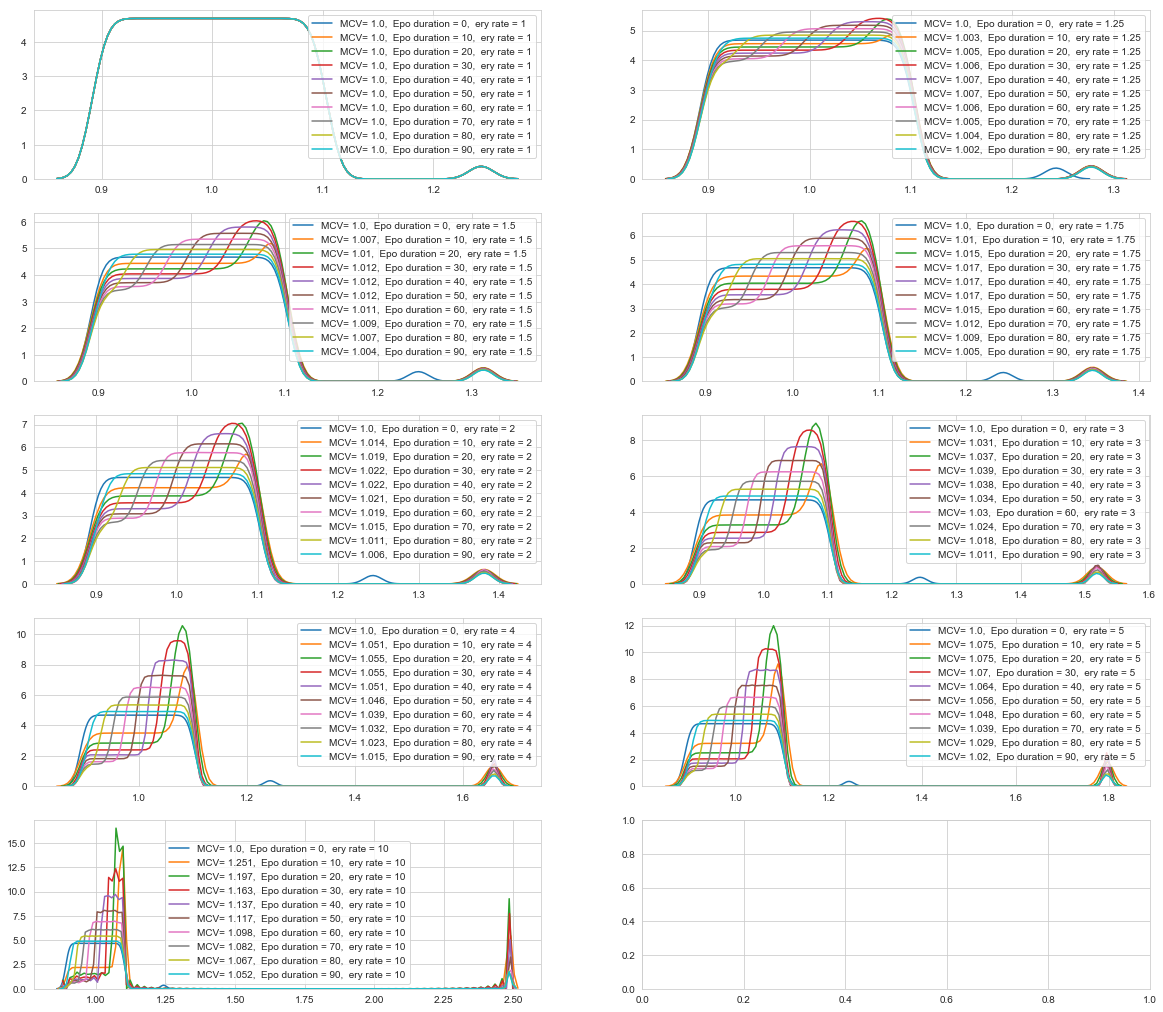

In [25]:
# Set ery rate as one of the dictionary keys: 

Epo_days = range(0, 100, 10) # Desired number of days of Epo treatment
day_list = [] # list of days of Epo treatment
for day in Epo_days:
    day_list.append(day)

MCV_fixedDay= {} # dictionary of MCVs for each fold increase


fig, axes = plt.subplots(5, 2, sharex = False, figsize = (20, 18))

for eday in Epo_days:
    MCV_list = []  #list of MCVs for increasing f, on a given day
    for f, value in stressD.items():

        #obtain the correspnding fVr, volume distribution, and Mat value 
        fVr = stressD[f][0]
        V = get_vol_1day(Vt=1.25, fVr=fVr, RClife = 95)
        Mat = stressD[f][2]
        i = stressD[f][3]
        
        MCV, N, RCVols =plot_MCV(x=eday, f=f, V=V, Mat = Mat, RClife = 95)
        
        MCV_list.append(MCV)

        sns.distplot(RCVols, hist=False, rug=False, label = 'MCV= '+str(MCV)+ ',  Epo duration = '+ str(eday)
              +',  ery rate = '+str(f), ax = axes[i//2, i%2])
        #ax.set_title(',  ery rate = '+str(f))
        plt.legend
        #plt.ylim(0, 9)
        #plt.xlim(0.8,1.5)
        
    MCV_fixedDay[eday] = MCV_list


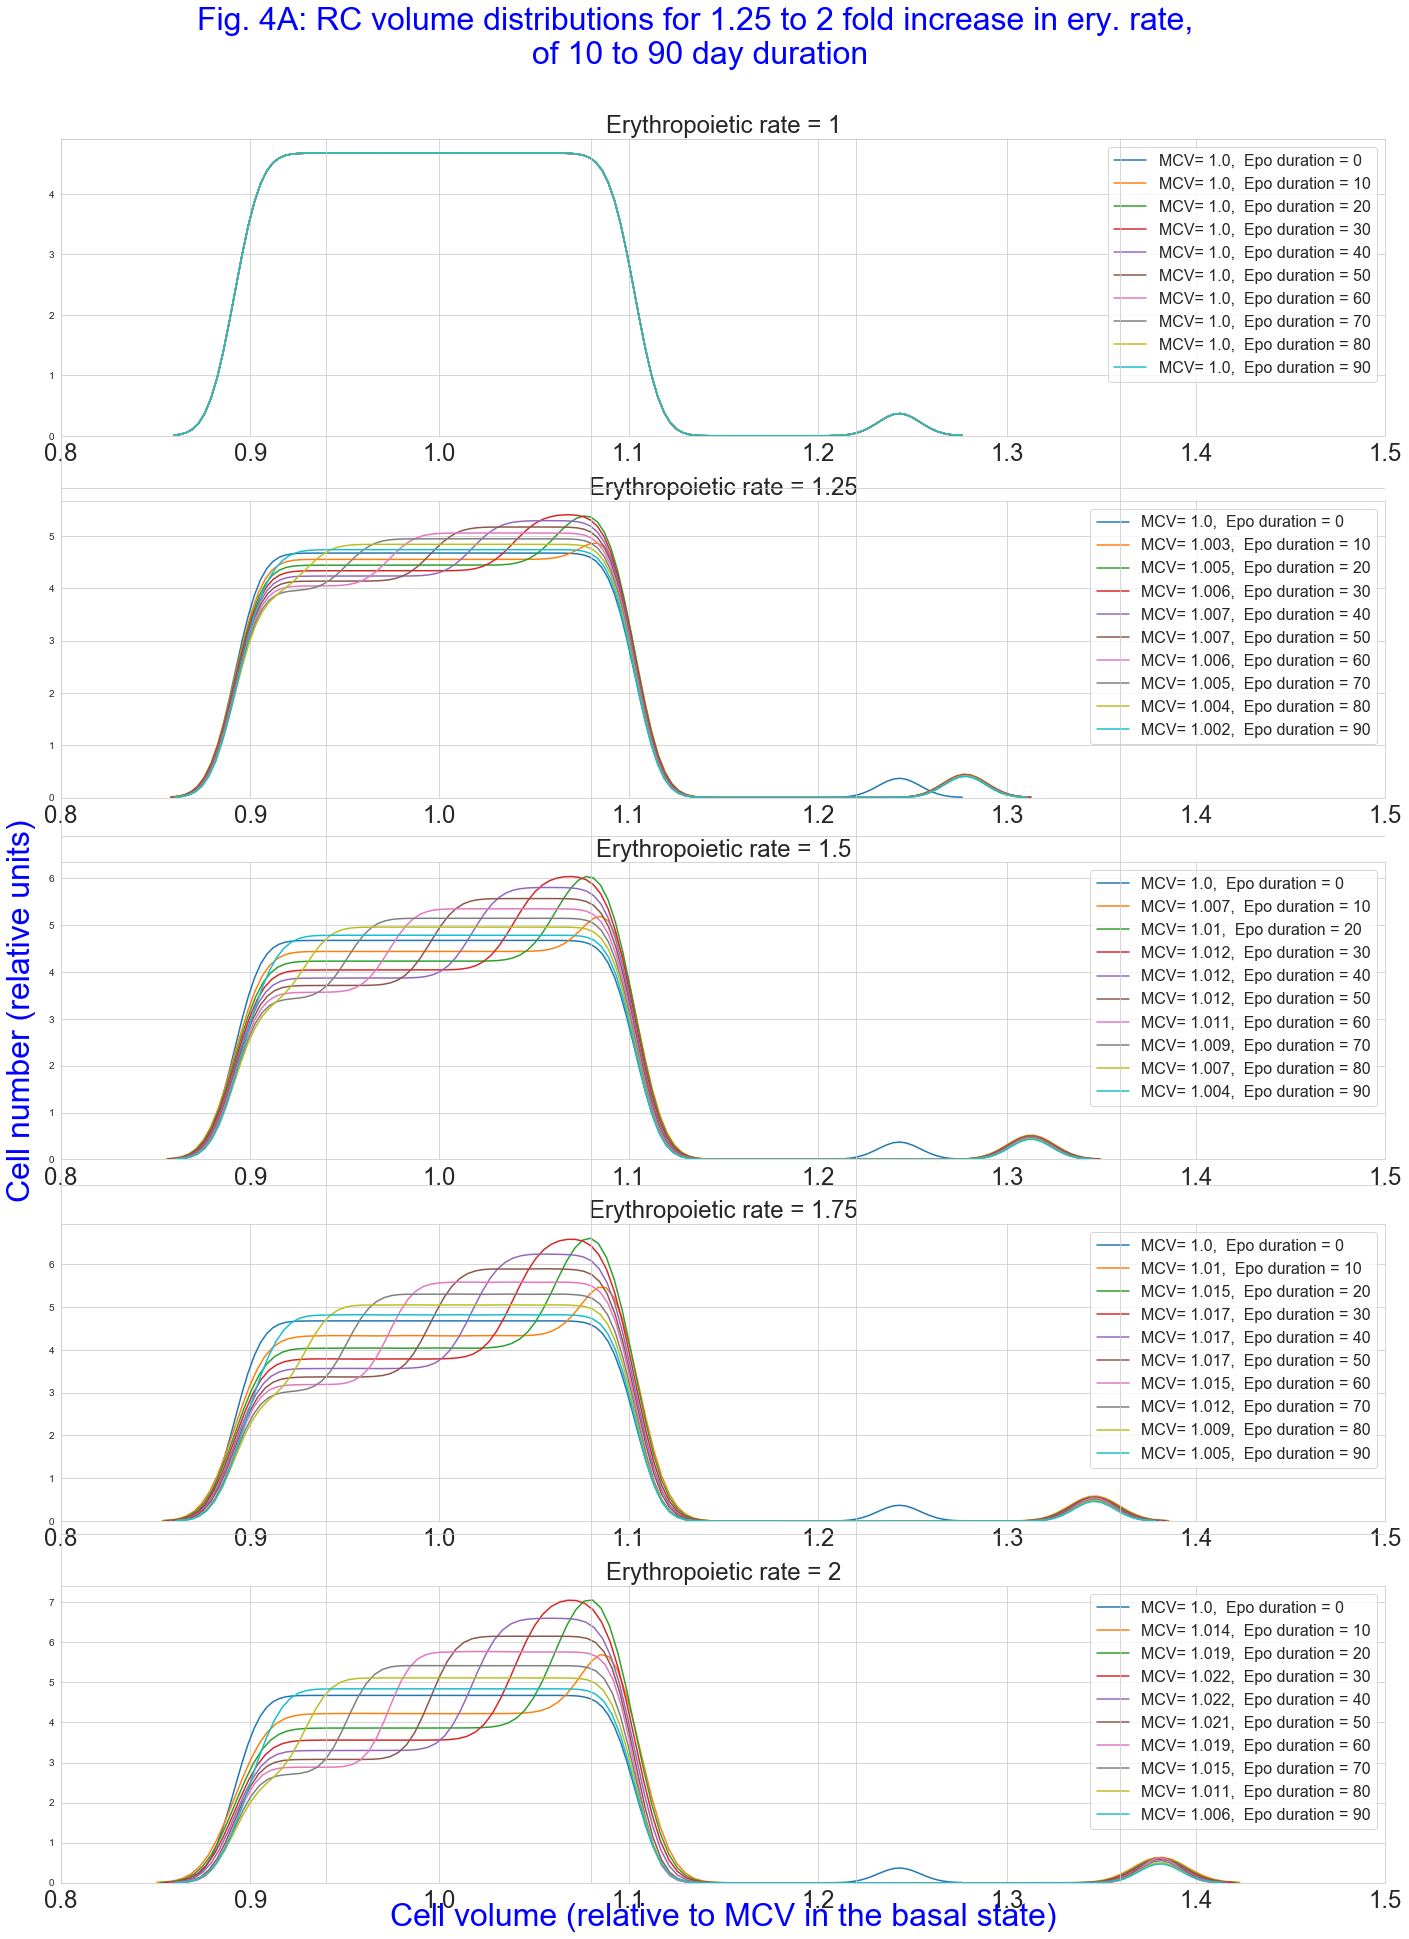

In [26]:
#Set ery rate as one of the dictionary keys: 

Epo_days = range(0, 100, 10) # Desired number of days of Epo treatment
day_list = [] # list of days of Epo treatment
for day in Epo_days:
    day_list.append(day)


fig, axes = plt.subplots(5, 1, sharex = True, figsize = (20, 26))
sns.set_style('whitegrid')
f_list_1 = [1, 1.25, 1.5, 1.75, 2]
f_list_2 = [1,2,4,5,10]
for i, f  in enumerate(f_list_1):
    plt.subplot(5,1,i+1)
    for eday in Epo_days:
        
        #obtain the correspnding fVr, volume distribution, and Mat value 
        fVr = stressD[f][0]
        V = get_vol_1day(Vt=1.25, fVr=fVr, RClife = 95)
        Mat = stressD[f][2]
        i = stressD[f][3]
        
        MCV, N, RCVols =plot_MCV(x=eday, f=f, V=V, Mat = Mat, RClife = 95)
        

        sns.distplot(RCVols, hist=False, rug=False, label = 'MCV= '+str(MCV)+ ',  Epo duration = '+ str(eday))
        #ax.set_title(',  ery rate = '+str(f))
    plt.xlim(0.8, 1.5)
    plt.xticks(fontsize = 24)
    plt.legend(fontsize = 16)
    plt.title('Erythropoietic rate = '+str(f), fontsize = 24)
    #plt.legend(fontsize = 'x-large')
    #sns.set_context('talk')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Cell number (relative units)', fontsize = 32, color = 'blue')
plt.xlabel('Cell volume (relative to MCV in the basal state)', fontsize = 32, color = 'blue')

suptitle = plt.suptitle('''Fig. 4A: RC volume distributions for 1.25 to 2 fold increase in ery. rate, 
of 10 to 90 day duration''', 
                        fontsize = 32, color = 'blue', y = 1.05)
fig.tight_layout()
plt.savefig('Figures/RClife95/RC volume distributions for varying level and duration of Epo stimulation.pdf',
           bbox_extra_artists=(suptitle,), bbox_inches="tight")

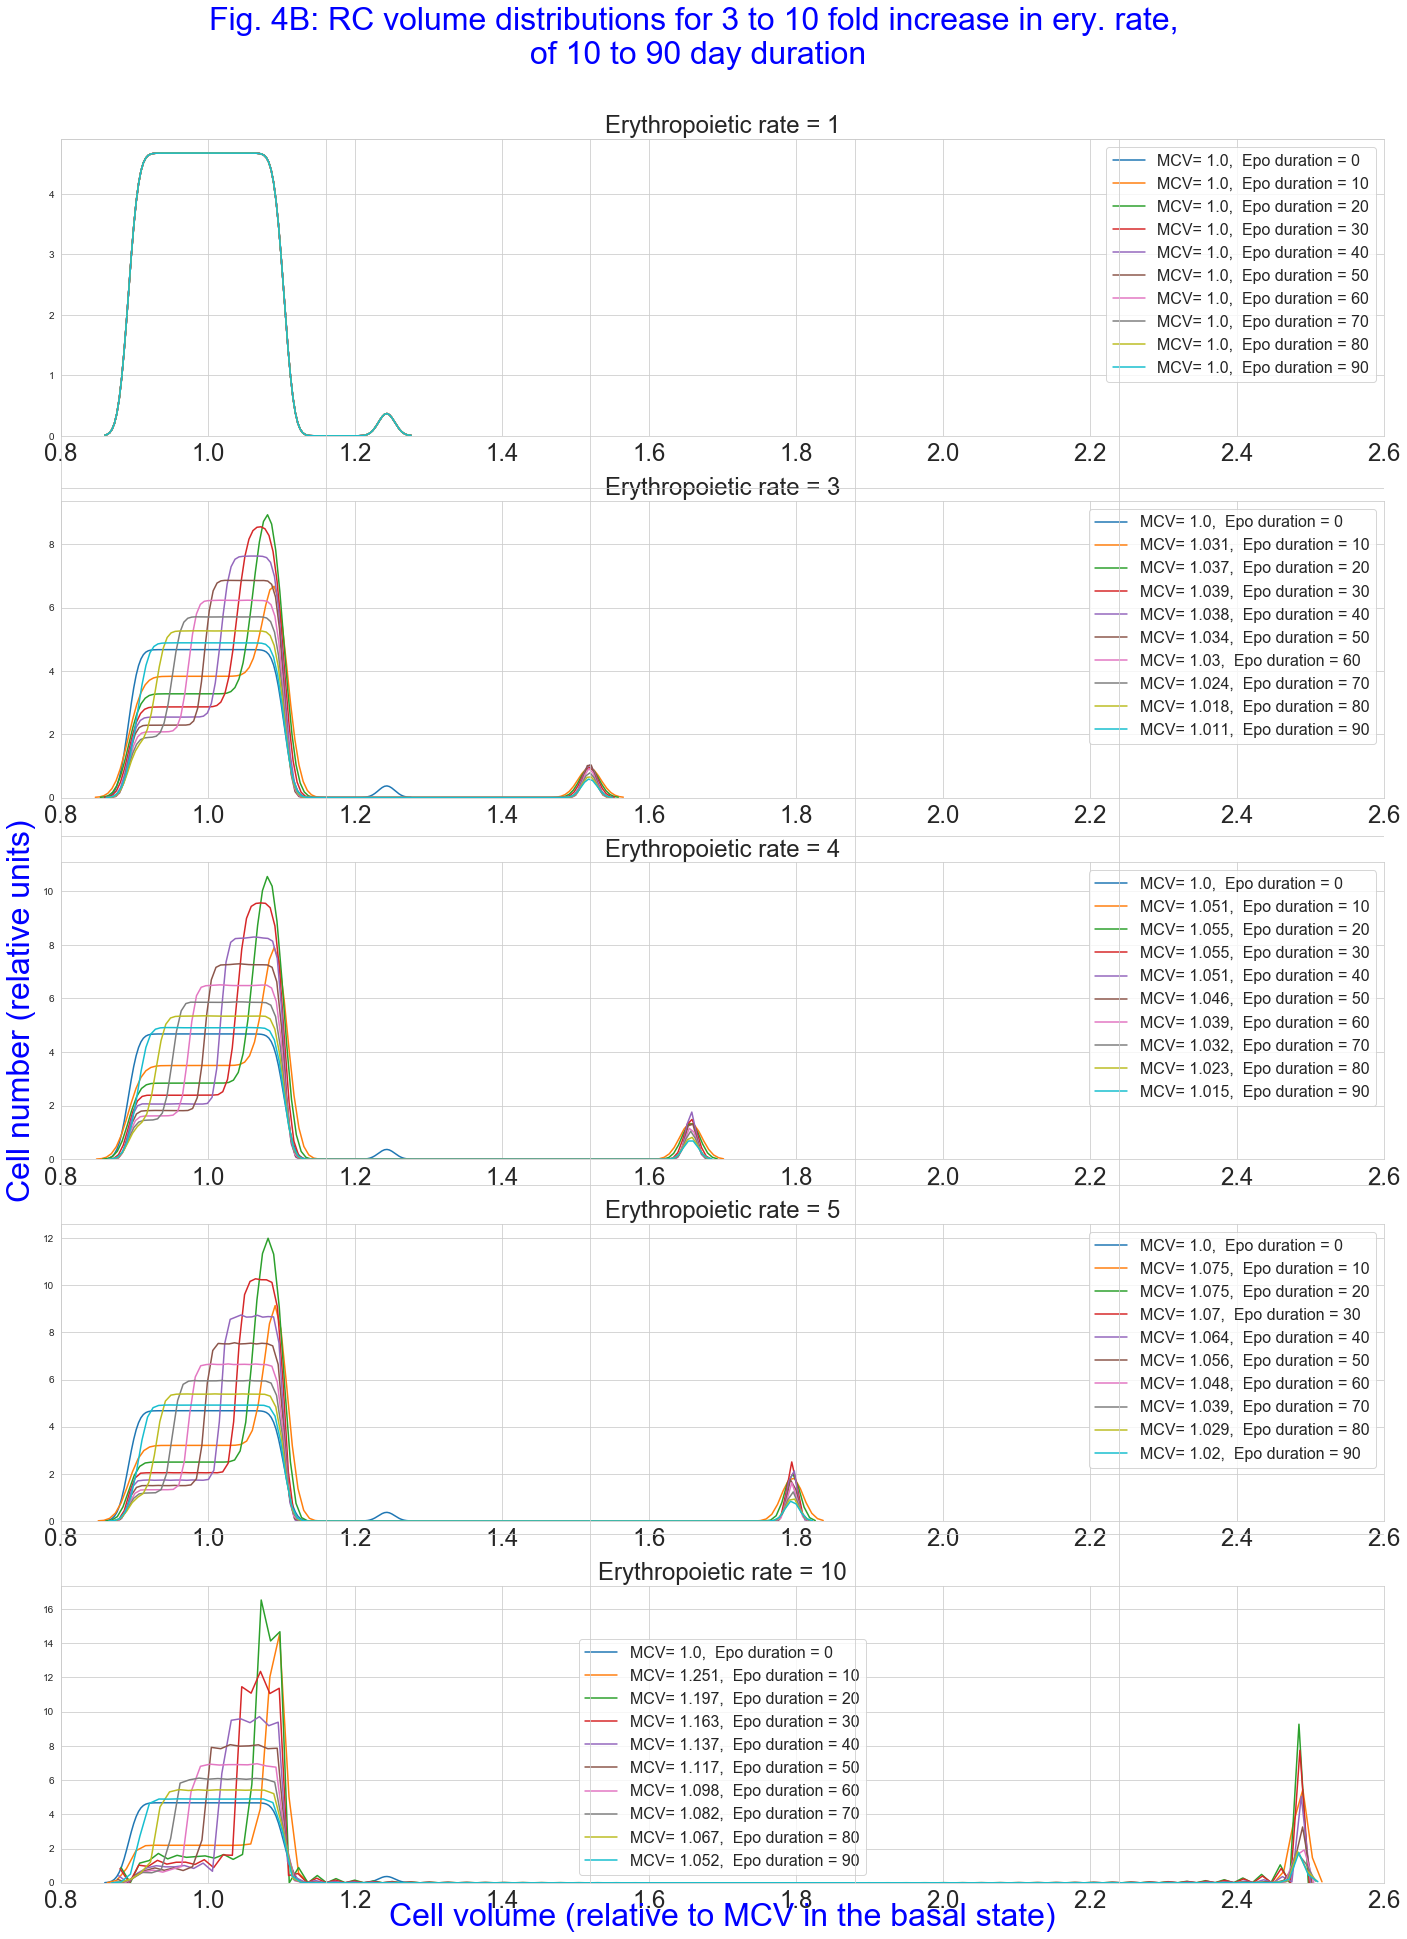

In [27]:
#Set ery rate as one of the dictionary keys: 

Epo_days = range(0, 100, 10) # Desired number of days of Epo treatment
day_list = [] # list of days of Epo treatment
for day in Epo_days:
    day_list.append(day)


fig, axes = plt.subplots(5, 1, sharex = True, figsize = (20, 26))
f_list_1 = [1, 1.25, 1.5, 1.75, 2]
f_list_2 = [1,3,4,5,10]
for i, f  in enumerate(f_list_2):
    plt.subplot(5,1,i+1)
    for eday in Epo_days:
        
        #obtain the correspnding fVr, volume distribution, and Mat value 
        fVr = stressD[f][0]
        V = get_vol_1day(Vt=1.25, fVr=fVr, RClife = 95)
        Mat = stressD[f][2]
        i = stressD[f][3]
        
        MCV, N, RCVols =plot_MCV(x=eday, f=f, V=V, Mat = Mat, RClife = 95)
        

        sns.distplot(RCVols, hist=False, rug=False, label = 'MCV= '+str(MCV)+ ',  Epo duration = '+ str(eday))
        #ax.set_title(',  ery rate = '+str(f))
    plt.xlim(0.8, 2.6)
    plt.xticks(fontsize = 24)
    plt.legend(fontsize = 16)
    plt.title('Erythropoietic rate = '+str(f), fontsize = 24)
    #plt.legend(fontsize = 'x-large')
    #sns.set_context('talk')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Cell number (relative units)', fontsize = 32, color = 'blue')
plt.xlabel('Cell volume (relative to MCV in the basal state)', fontsize = 32, color = 'blue')

suptitle = plt.suptitle('''Fig. 4B: RC volume distributions for 3 to 10 fold increase in ery. rate, 
of 10 to 90 day duration''', 
                        fontsize = 32, color = 'blue', y = 1.05)
fig.tight_layout()
plt.savefig('Figures/RClife95/RC volume distributions for varying level and duration of Epo stimulation_2.pdf',
           bbox_extra_artists=(suptitle,), bbox_inches="tight")

In [28]:
MCV_fixedDay #dictionary of MCV for increasing f, on a given day of Epo treatment

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.003, 1.007, 1.01, 1.014, 1.031, 1.051, 1.075, 1.251],
 20: [1.0, 1.005, 1.01, 1.015, 1.019, 1.037, 1.055, 1.075, 1.197],
 30: [1.0, 1.006, 1.012, 1.017, 1.022, 1.039, 1.055, 1.07, 1.163],
 40: [1.0, 1.007, 1.012, 1.017, 1.022, 1.038, 1.051, 1.064, 1.137],
 50: [1.0, 1.007, 1.012, 1.017, 1.021, 1.034, 1.046, 1.056, 1.117],
 60: [1.0, 1.006, 1.011, 1.015, 1.019, 1.03, 1.039, 1.048, 1.098],
 70: [1.0, 1.005, 1.009, 1.012, 1.015, 1.024, 1.032, 1.039, 1.082],
 80: [1.0, 1.004, 1.007, 1.009, 1.011, 1.018, 1.023, 1.029, 1.067],
 90: [1.0, 1.002, 1.004, 1.005, 1.006, 1.011, 1.015, 1.02, 1.052]}

In [29]:
fold_increase = [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]
for i in range(9):
    y = []
    for k, v in MCV_fixedDay.items():        
        y.append(v[i])
    print (y, 'ery_rate=' +' '+str(fold_increase[i]))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] ery_rate= 1
[1.0, 1.003, 1.005, 1.006, 1.007, 1.007, 1.006, 1.005, 1.004, 1.002] ery_rate= 1.25
[1.0, 1.007, 1.01, 1.012, 1.012, 1.012, 1.011, 1.009, 1.007, 1.004] ery_rate= 1.5
[1.0, 1.01, 1.015, 1.017, 1.017, 1.017, 1.015, 1.012, 1.009, 1.005] ery_rate= 1.75
[1.0, 1.014, 1.019, 1.022, 1.022, 1.021, 1.019, 1.015, 1.011, 1.006] ery_rate= 2
[1.0, 1.031, 1.037, 1.039, 1.038, 1.034, 1.03, 1.024, 1.018, 1.011] ery_rate= 3
[1.0, 1.051, 1.055, 1.055, 1.051, 1.046, 1.039, 1.032, 1.023, 1.015] ery_rate= 4
[1.0, 1.075, 1.075, 1.07, 1.064, 1.056, 1.048, 1.039, 1.029, 1.02] ery_rate= 5
[1.0, 1.251, 1.197, 1.163, 1.137, 1.117, 1.098, 1.082, 1.067, 1.052] ery_rate= 10


In [30]:
fold_increase = [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]
TimeCourse = {}
for i,f in enumerate(fold_increase):
    y = []
    for k, v in MCV_fixedDay.items():        
        y.append(v[i])
    TimeCourse[f] = y
TimeCourse

{1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1.25: [1.0, 1.003, 1.005, 1.006, 1.007, 1.007, 1.006, 1.005, 1.004, 1.002],
 1.5: [1.0, 1.007, 1.01, 1.012, 1.012, 1.012, 1.011, 1.009, 1.007, 1.004],
 1.75: [1.0, 1.01, 1.015, 1.017, 1.017, 1.017, 1.015, 1.012, 1.009, 1.005],
 2: [1.0, 1.014, 1.019, 1.022, 1.022, 1.021, 1.019, 1.015, 1.011, 1.006],
 3: [1.0, 1.031, 1.037, 1.039, 1.038, 1.034, 1.03, 1.024, 1.018, 1.011],
 4: [1.0, 1.051, 1.055, 1.055, 1.051, 1.046, 1.039, 1.032, 1.023, 1.015],
 5: [1.0, 1.075, 1.075, 1.07, 1.064, 1.056, 1.048, 1.039, 1.029, 1.02],
 10: [1.0, 1.251, 1.197, 1.163, 1.137, 1.117, 1.098, 1.082, 1.067, 1.052]}

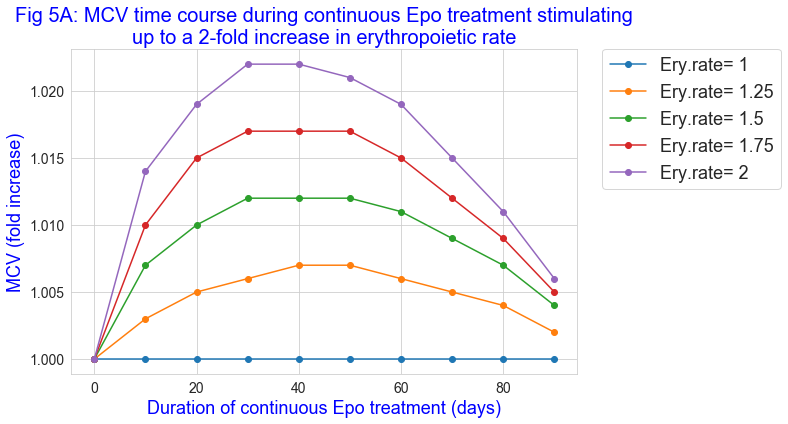

In [31]:
fig, ax = plt.subplots(figsize = (15,10))

x = MCV_fixedDay.keys()

f_list_1 = [1, 1.25, 1.5, 1.75, 2]
f_list_2 = [1,3,4,5,10]
for f in f_list_1:
    y = TimeCourse[f]
    ax.plot(x, y, marker= 'o', label = 'Ery.rate=' +' '+str(f))
    
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.legend(loc='upper right', bbox_to_anchor=(1.42, 1.03),fontsize = 18)
ax.set_ylabel('MCV (fold increase)', fontsize = 18,color = 'blue')
ax.set_xlabel('Duration of continuous Epo treatment (days)',fontsize = 18,color = 'blue')
plt.title('Fig 5A: MCV time course during continuous Epo treatment stimulating\nup to a 2-fold increase in erythropoietic rate',
         fontsize = 20, color = 'blue')
#ax.set_title()
fig.set_size_inches([12, 6.0])
fig.tight_layout()
plt.savefig('Figures/RClife95/MCV time course continuous Epo_1.pdf')
plt.show()

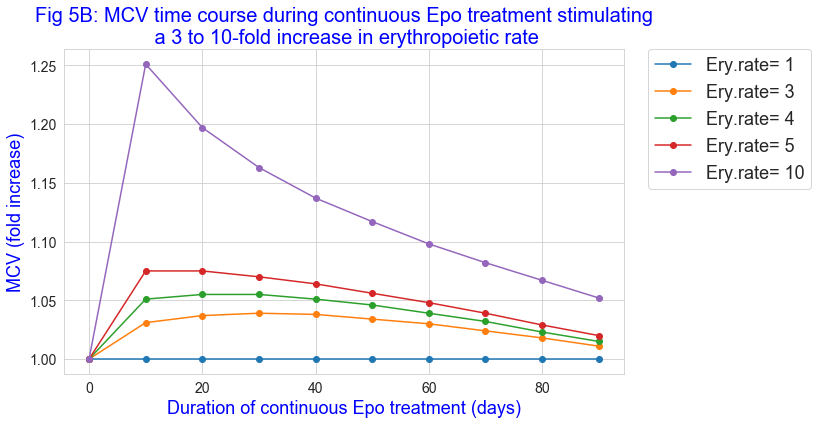

In [32]:
fig, ax = plt.subplots(figsize = (15,10))

x = MCV_fixedDay.keys()


f_list_1 = [1, 1.25, 1.5, 1.75, 2]
f_list_2 = [1,3,4,5,10]
for f in f_list_2:
    y = TimeCourse[f]
    ax.plot(x, y, marker= 'o', label = 'Ery.rate=' +' '+str(f))
    
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.03),fontsize = 18)
ax.set_ylabel('MCV (fold increase)', fontsize = 18, color = 'blue')
ax.set_xlabel('Duration of continuous Epo treatment (days)',fontsize = 18,color = 'blue')
plt.title('Fig 5B: MCV time course during continuous Epo treatment stimulating\n a 3 to 10-fold increase in erythropoietic rate',
          fontsize = 20, color = 'blue')
#ax.set_title()
fig.set_size_inches([12, 6.0])
fig.tight_layout()
plt.savefig('Figures/RClife95/MCV time course continuous Epo_2.pdf')
plt.show()

## 5. Incorporate post-treatment period of Epo withdrawal:

In [33]:
# Generate lists of Epo treatment durations followed by post-treatment days as a list of (x,z) tuples:
Eday_list = [day for day in range(0, 110, 10)] # list of days of Epo treatment

treat_dict = {}

for eday in Eday_list:
    treat_list = []

    for i in Eday_list:
        if i<= eday:
            treat_list.append((i, 0))
        else:
            treat_list.append((eday, i-eday))
    treat_dict[eday] = treat_list
print(treat_dict)

{0: [(0, 0), (0, 10), (0, 20), (0, 30), (0, 40), (0, 50), (0, 60), (0, 70), (0, 80), (0, 90), (0, 100)], 10: [(0, 0), (10, 0), (10, 10), (10, 20), (10, 30), (10, 40), (10, 50), (10, 60), (10, 70), (10, 80), (10, 90)], 20: [(0, 0), (10, 0), (20, 0), (20, 10), (20, 20), (20, 30), (20, 40), (20, 50), (20, 60), (20, 70), (20, 80)], 30: [(0, 0), (10, 0), (20, 0), (30, 0), (30, 10), (30, 20), (30, 30), (30, 40), (30, 50), (30, 60), (30, 70)], 40: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (40, 10), (40, 20), (40, 30), (40, 40), (40, 50), (40, 60)], 50: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (50, 10), (50, 20), (50, 30), (50, 40), (50, 50)], 60: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (60, 0), (60, 10), (60, 20), (60, 30), (60, 40)], 70: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (60, 0), (70, 0), (70, 10), (70, 20), (70, 30)], 80: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (60, 0), (70, 0), (80, 0), (80, 10), (80, 20)], 90: [(0, 0), (10, 0

#### Choose Erythropoietic rate, from the list of fold_increase

In [34]:
f = input('Choose fold-increase in erythropoietic rate from this list: '+ str(fold_increase))

Choose fold-increase in erythropoietic rate from this list: [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]1.25


#### Choose maximal Epo treatment duration

In [35]:
EpoDays= input('choose the maximal length of Epo treatment, betwee 10 and 100 in 10 day intervals: ')

choose the maximal length of Epo treatment, betwee 10 and 100 in 10 day intervals: 50


#### Plot RC volume distribution over time, for a given duration of Epo treatment and a given increase in Ery rate

In [36]:
Eday_list = [day for day in range(0, 110, 10)] # list of days of Epo treatment

i = Eday_list.index(int(EpoDays))
Eday_list = Eday_list[1:i+1]
Eday_list

[10, 20, 30, 40, 50]

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


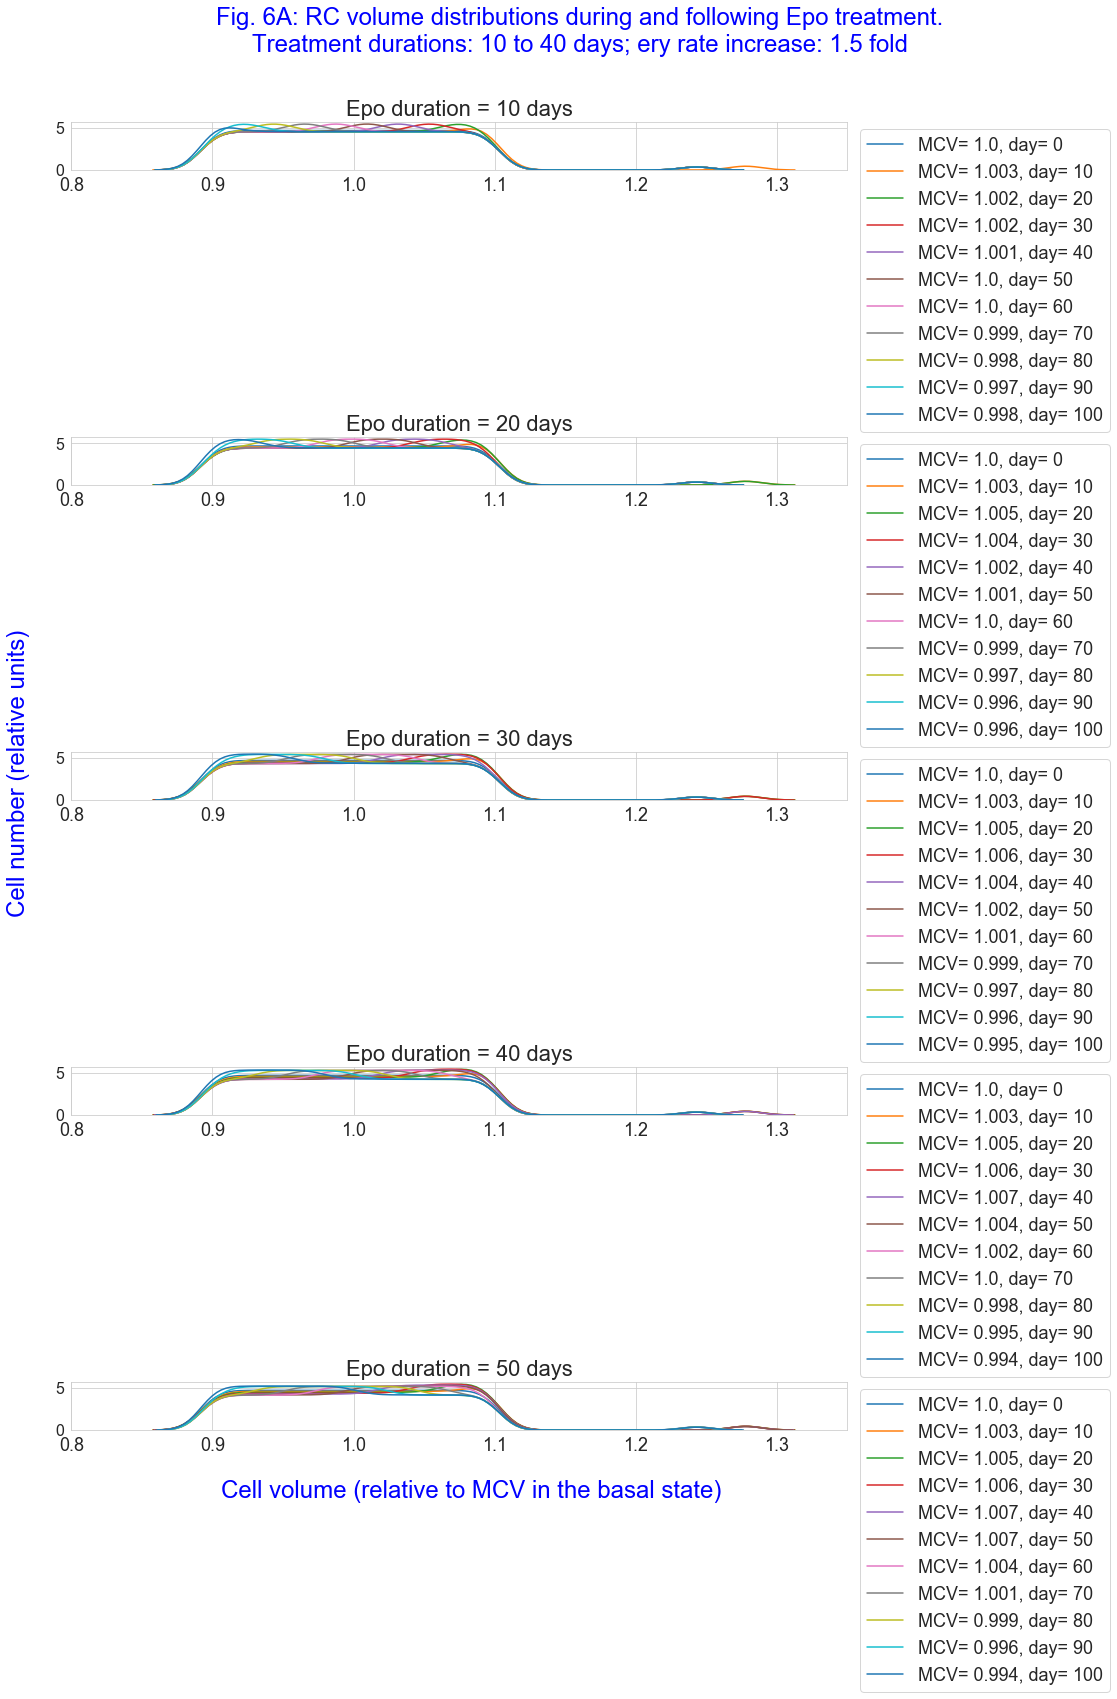

In [37]:
#for eday, treat in treat_dict.itmes():

f = float(f)
MCV_dict = {}
nrows = len(Eday_list)
fig, ax  = plt.subplots(nrows=nrows, ncols=1, sharex = True, figsize = (15,19))

#for eday, treat in treat_dict.items():   
for i,eday in enumerate(Eday_list):  
    plt.subplot(nrows, 1, i+1)
    MCV_list = []
    for t in treat_dict[eday]:
        
        #obtain the correspnding fVr, volume distribution, and Mat value 
        fVr = stressD[f][0]
        V = get_vol_1day(Vt=1.25, fVr=fVr, RClife = 95)
        Mat = stressD[f][2]
        i = stressD[f][3]
        
        MCV, N, RCVols =plot_MCV(x =t[0], f=f, V=V, Mat = Mat, z =t[1], RClife =95)                
        MCV_list.append(MCV)
        
        
        sns.distplot(RCVols, hist=False, rug=False, label = 'MCV= '+str(MCV)+', day= '+str(t[0]+t[1]))
    plt.xlim(0.8, 1.35)    
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 16)
    legend = plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.03), fontsize = 18)
    MCV_dict[eday] = MCV_list
    plt.title('Epo duration = '+ str(t[0])+' days', fontsize = 22) 
    plt.tight_layout()
fig.tight_layout()    

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.ylabel('Cell number (relative units)', fontsize = 24, color = 'blue')
#plt.xlabel('Cell volume (relative to MCV in the basal state)', fontsize = 24, color = 'blue')

xlabel = fig.text(0.4, -0.03, 'Cell volume (relative to MCV in the basal state)', ha='center', fontsize = 24, color = 'blue')
ylabel = fig.text(-0.03, 0.5, 'Cell number (relative units)', va='center', 
         rotation='vertical',fontsize = 24, color = 'blue')
suptitle = plt.suptitle('''Fig. 6A: RC volume distributions during and following Epo treatment.
Treatment durations: 10 to 40 days; ery rate increase: 1.5 fold''', 
                        fontsize = 24, color = 'blue', y = 1.06)
fig.tight_layout()
plt.savefig('Figures/RClife95/RC volume distributions_Epo10-40d_f_150.pdf',
           bbox_extra_artists=(suptitle, legend, xlabel, ylabel), bbox_inches="tight")

#### Choose Erythropoietic rate, from the list of fold_increase

In [38]:
EpoDays= input('choose the maximal length of Epo treatment, betwee 10 and 100 in 10 day intervals: ')

choose the maximal length of Epo treatment, betwee 10 and 100 in 10 day intervals: 50


#### Choose maximal Epo treatment duration

In [39]:
f = input('Choose fold-increase in erythropoietic rate from this list: '+ str(fold_increase))

Choose fold-increase in erythropoietic rate from this list: [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]1.25


In [40]:
Eday_list = [day for day in range(0, 110, 10)] # list of days of Epo treatment
i = Eday_list.index(int(EpoDays))
Eday_list = Eday_list[3:i+1]
Eday_list

[30, 40, 50]

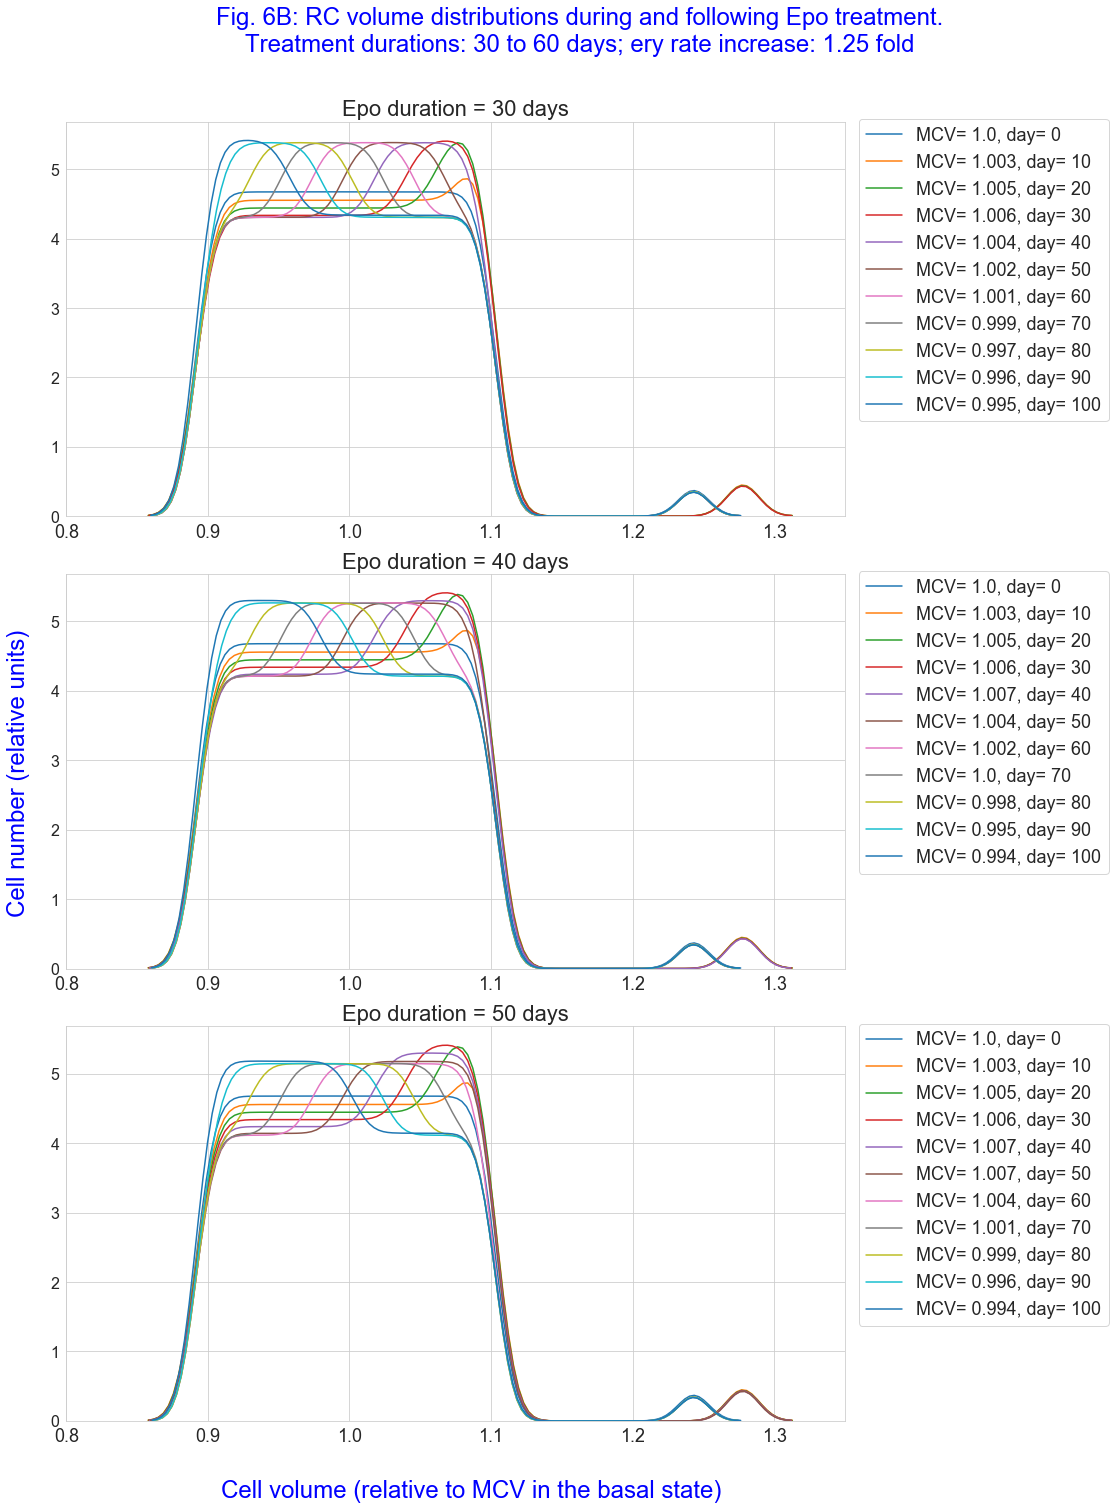

In [41]:
#for eday, treat in treat_dict.itmes():

f = float(f)
MCV_dict = {}
nrows = len(Eday_list)
fig, ax  = plt.subplots(nrows=nrows, ncols=1, sharex = True, figsize = (15,19))

#for eday, treat in treat_dict.items():   
for i,eday in enumerate(Eday_list):  
    plt.subplot(nrows, 1, i+1)
    MCV_list = []
    for t in treat_dict[eday]:
        
        #obtain the correspnding fVr, volume distribution, and Mat value 
        fVr = stressD[f][0]
        V = get_vol_1day(Vt=1.25, fVr=fVr, RClife = 95)
        Mat = stressD[f][2]
        i = stressD[f][3]
        
        MCV, N, RCVols =plot_MCV(x =t[0], f=f, V=V, Mat = Mat, z =t[1], RClife =95)                
        MCV_list.append(MCV)
        
        
        sns.distplot(RCVols, hist=False, rug=False, label = 'MCV= '+str(MCV)+', day= '+str(t[0]+t[1]))
    plt.xlim(0.8, 1.35)    
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 16)
    legend = plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.03), fontsize = 18)
    MCV_dict[eday] = MCV_list
    plt.title('Epo duration = '+ str(t[0])+' days', fontsize = 22) 
    plt.tight_layout()
fig.tight_layout()    

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.ylabel('Cell number (relative units)', fontsize = 24, color = 'blue')
#plt.xlabel('Cell volume (relative to MCV in the basal state)', fontsize = 24, color = 'blue')

xlabel = fig.text(0.4, -0.03, 'Cell volume (relative to MCV in the basal state)', ha='center',
                  fontsize = 24, color = 'blue')
ylabel = fig.text(-0.03, 0.5, 'Cell number (relative units)', va='center', 
         rotation='vertical',fontsize = 24, color = 'blue')
suptitle = plt.suptitle('''Fig. 6B: RC volume distributions during and following Epo treatment.
Treatment durations: 30 to 60 days; ery rate increase: 1.25 fold''', 
                        fontsize = 24, color = 'blue', y = 1.06)
fig.tight_layout()
plt.savefig('Figures/RClife95/RC volume distributions_Epo30-60d_f_125.pdf',
           bbox_extra_artists=(suptitle, legend, xlabel, ylabel), bbox_inches="tight")

#### Choose Erythropoietic rate, from the list of fold_increase

In [42]:
f = input('Choose fold-increase in erythropoietic rate from this list: '+ str(fold_increase))

Choose fold-increase in erythropoietic rate from this list: [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]1.25


#### Choose maximal Epo treatment duration

In [43]:
EpoDays= input('choose the maximal length of Epo treatment, betwee 10 and 100 in 10 day intervals: ')

choose the maximal length of Epo treatment, betwee 10 and 100 in 10 day intervals: 50


#### Plot RC volume distribution over time, for a given duration of Epo treatment and a given increase in Ery rate

In [44]:
Eday_list = [day for day in range(0, 110, 10)] # list of days of Epo treatment
i = Eday_list.index(int(EpoDays))
Eday_list = Eday_list[0:i+1]
Eday_list

[0, 10, 20, 30, 40, 50]

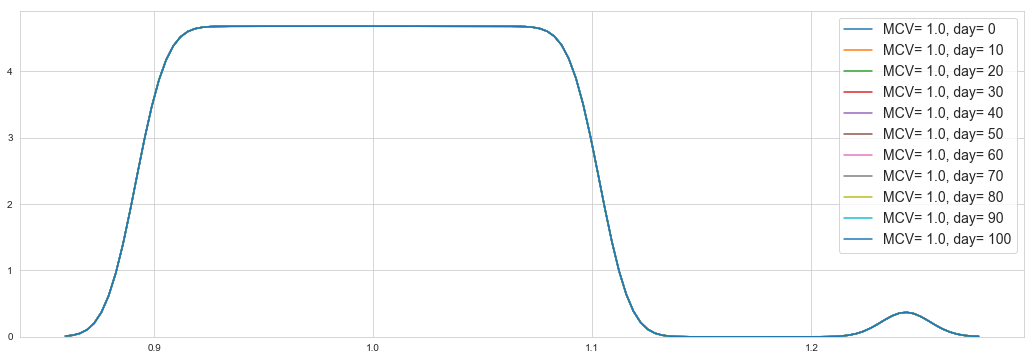

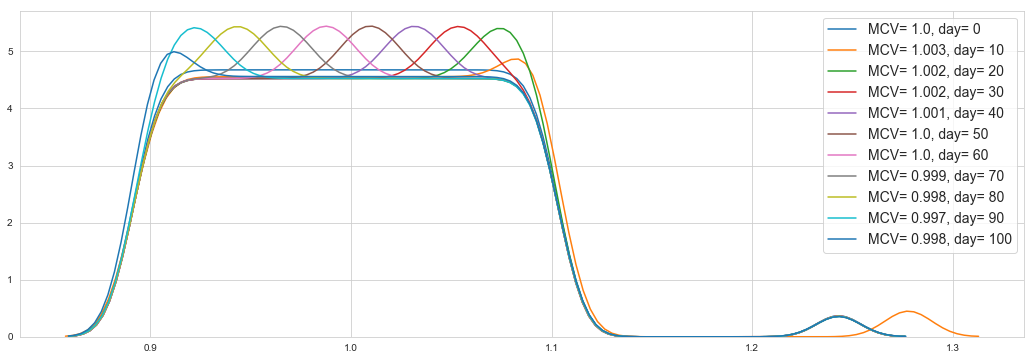

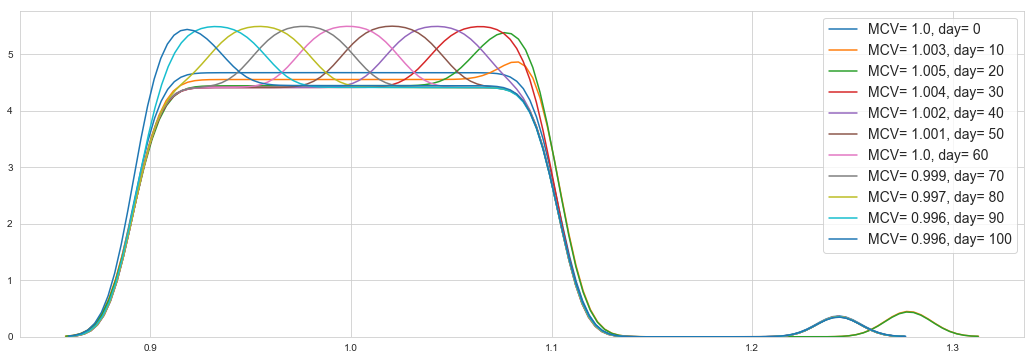

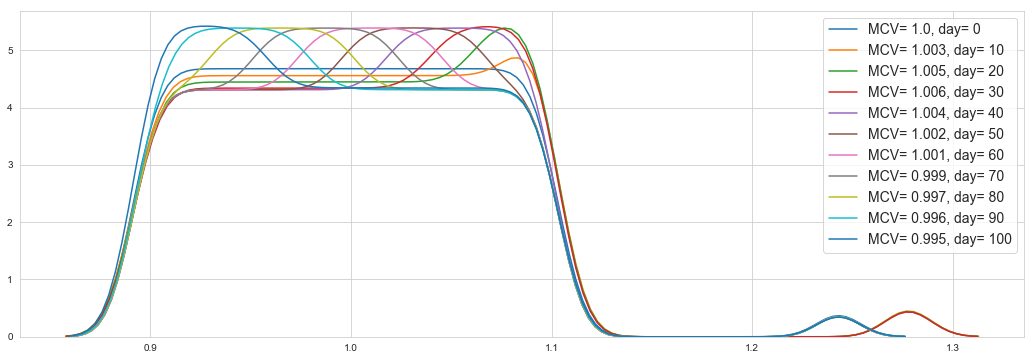

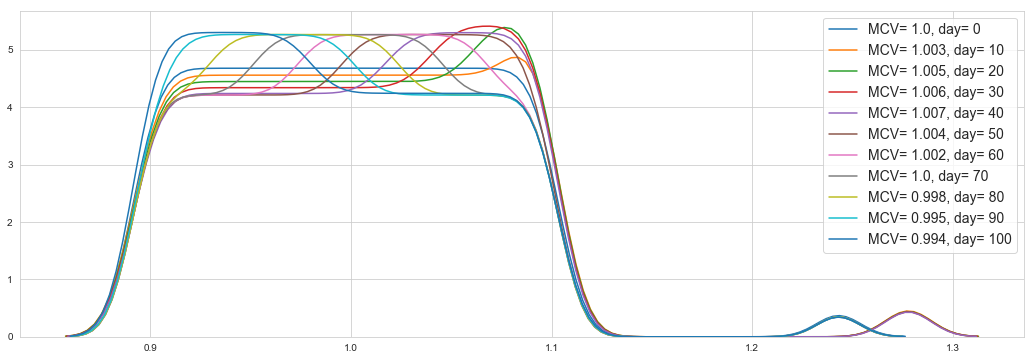

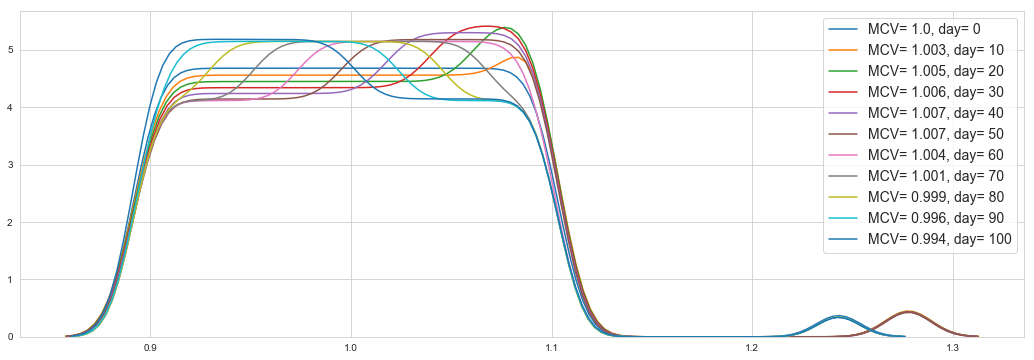

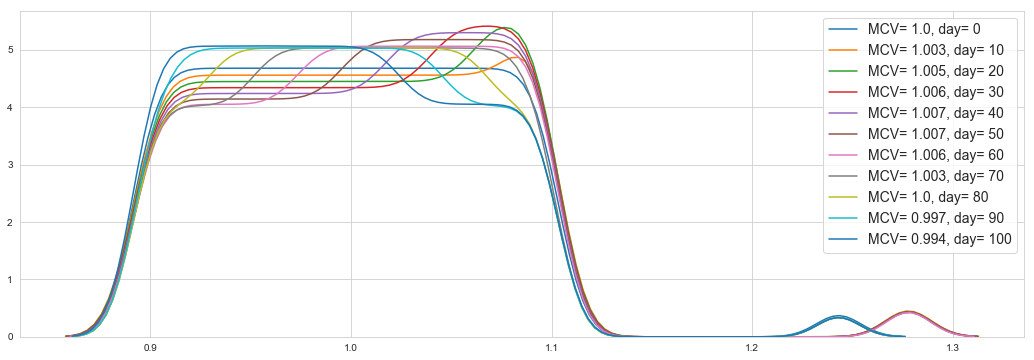

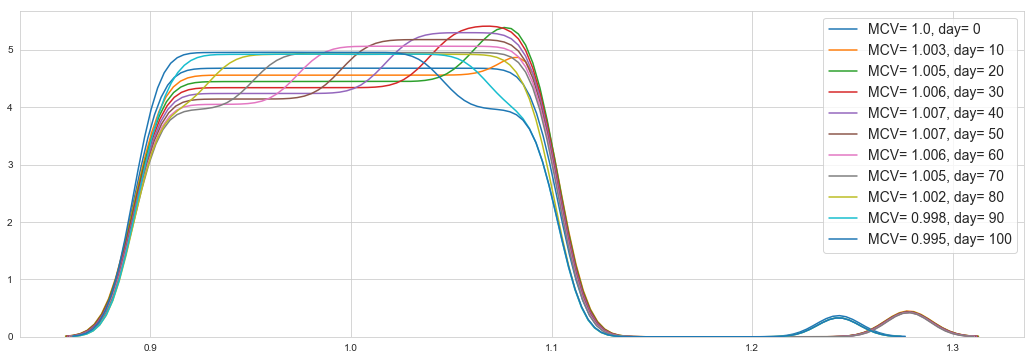

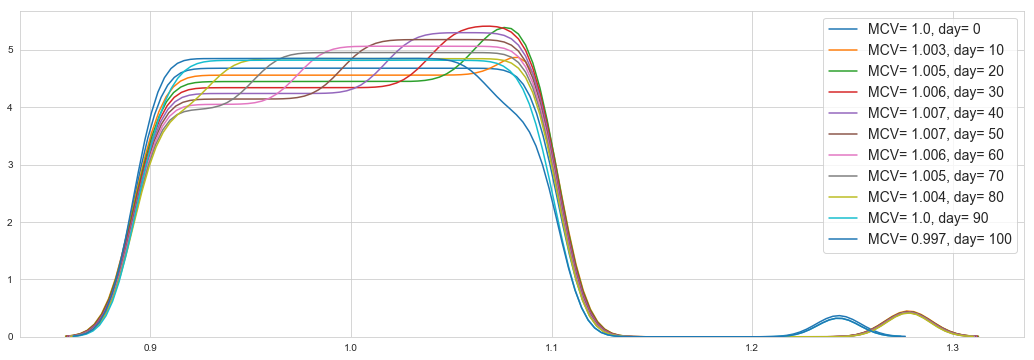

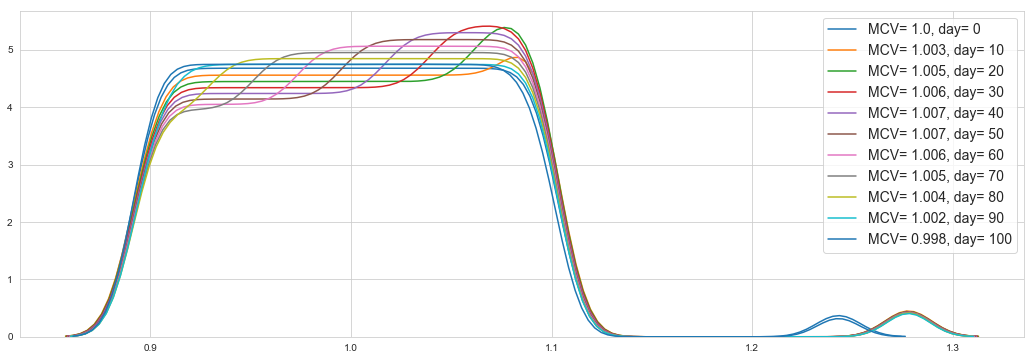

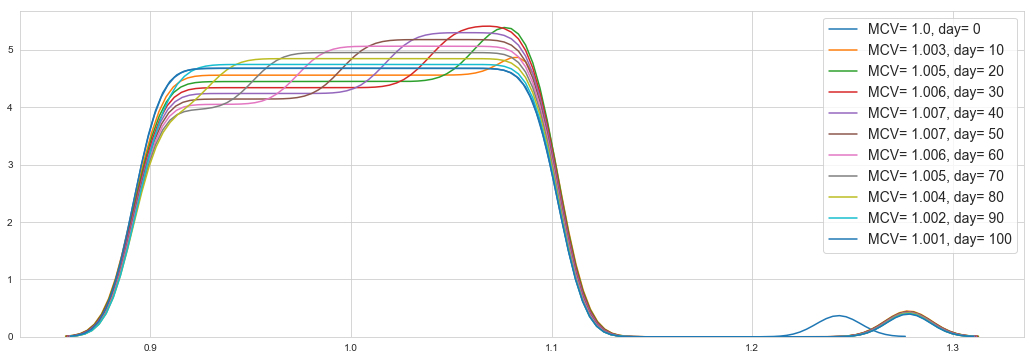

In [45]:
#for eday, treat in treat_dict.itmes():

f = float(f)
MCV_dict = {}
for eday, treat in treat_dict.items():   
    fig, ax  = plt.subplots(1,1, sharex = True, figsize = (18,6))
    MCV_list = []
    for t in treat: 
        
        #obtain the correspnding fVr, volume distribution, and Mat value 
        fVr = stressD[f][0]
        V = get_vol_1day(Vt=1.25, fVr=fVr, RClife = 95)
        Mat = stressD[f][2]
        i = stressD[f][3]
        
        MCV, N, RCVols =plot_MCV(x =t[0], f=f, V=V, Mat = Mat, z =t[1], RClife =95)                
        MCV_list.append(MCV)
        
        
        sns.distplot(RCVols, hist=False, rug=False, label = 'MCV= '+str(MCV)+', day= '+str(t[0]+t[1]))
        plt.legend(fontsize = 14)
    
    MCV_dict[eday] = MCV_list
    #plt.title('RC volume distributions, Ery rate = '+str(f)+', Epo duration = '+ str(t[0]), fontsize = 14)   

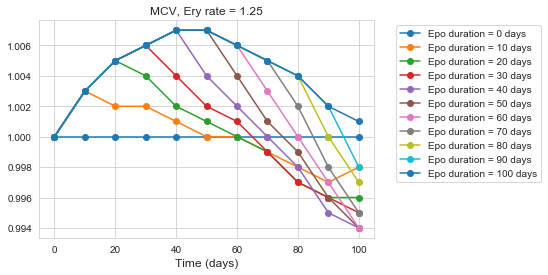

In [46]:
fig, ax = plt.subplots()
for eday in MCV_dict.keys():
    y = MCV_dict[eday]
    x = [i for i in range(0,110, 10)]

    ax.plot(x, y, marker= 'o', label = 'Epo duration = '+ str(eday)+' days')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title('MCV, Ery rate = '+ str(f))
    plt.xlabel('Time (days)', fontsize = 12)

## 6. Define function to generate MCV and retic time-course 

In [47]:
def time_course(f, distribution_plot=False, OneTimeCourse = False, treat_dict = {}, zf=1, RClife = 100, Vt = 1.25):
    '''Time course MCV during and followign Epo treatment for varying treatment durations
    Input: 
    f= fold increase in erythropoietic rate, from the list: [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]
    distribution_plot: if True, will generate RC volume distribution plot for each Epo treatment duration, with 
    overlays of all time points on the same graph
    OneTimeCourse: if True, must input the treatment dictionary; otherwise generates graphs for all Epo 
    treatment durations
    zf: fold decrease in retic number following Epo
   
   Output: 
    1. Optional: Volume distribution plots, one fo each Epo treatment duration, overlayed plots for all days in time course
    2. Dictionary of MCV lists: Keys are lengths of Epo treamtments (0 to 100, 10 day increments), 
    Values are corresponding lists, each containing MCV time course for 100 days
    3. Dictionary of Retic numbers for the same time course '''
    

    if OneTimeCourse == False:
   
        Eday_list = [day for day in range(0, 100, 10)] # list of days of Epo treatment
        treat_dict = {}
    
    
        for eday in Eday_list:
            treat_list = []
        
            for i in Eday_list:
                if i<= eday:
                    treat_list.append((i, 0))
                else:
                    treat_list.append((eday, i-eday))
            treat_dict[eday] = treat_list
            
    MCV_dict = {}
    Retic_dict = {}
    for eday, treat in treat_dict.items():   
        if distribution_plot==True:
            fig, ax  = plt.subplots(1,1, sharex = True, figsize = (18,6))
        MCV_list = []
        Retic_list = []
        for t in treat: 
        
            #obtain the correspnding fVr, volume distribution, and Mat value 
            fVr = stressD[f][0]
            V = get_vol_1day(Vt=Vt, fVr=fVr, RClife = RClife)
            Mat = stressD[f][2]
            i = stressD[f][3]
        
            MCV, N, RCVols =plot_MCV(x =t[0], f=f, V=V, Mat = Mat, z =t[1], zf = zf, RClife =RClife)                
            MCV_list.append(MCV)
            Retic_list.append(N[0]/100)
        
            if distribution_plot==True:
                sns.distplot(RCVols, hist=False, rug=False, label = 'MCV= '+str(MCV)+', day= '+str(t[0]+t[1]))
                plt.legend(fontsize = 14)        
                plt.title('RC volume distributions, Ery rate = '+str(f)+', Epo duration = '+ str(t[0])+' days', fontsize = 14) 
            
        MCV_dict[eday] = MCV_list
        Retic_dict[eday] = Retic_list
    return MCV_dict, Retic_dict

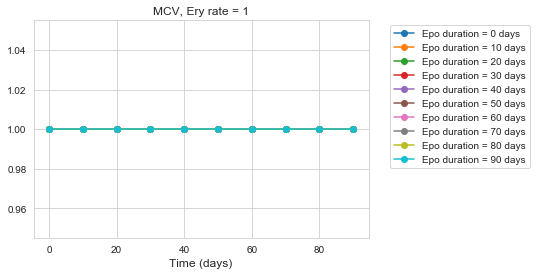

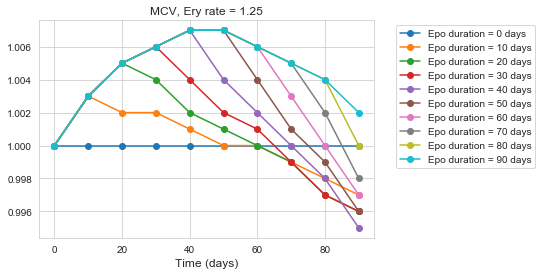

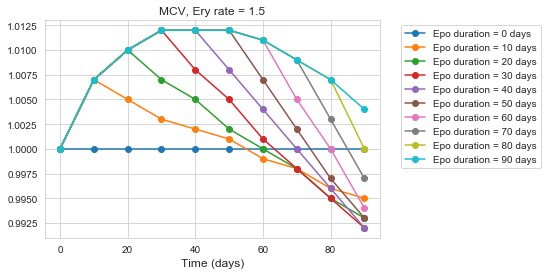

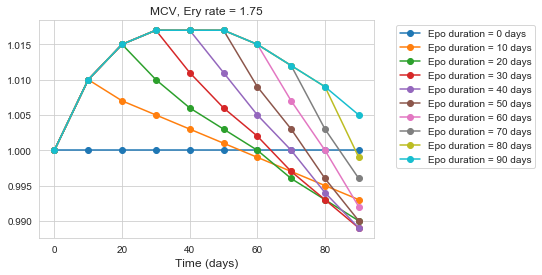

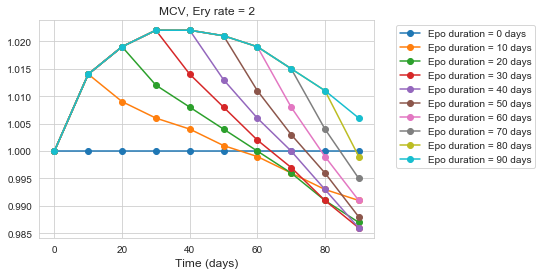

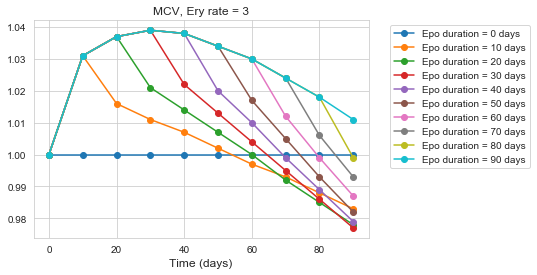

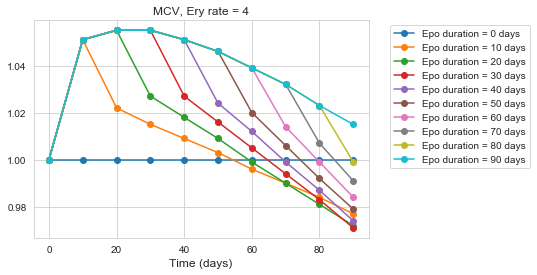

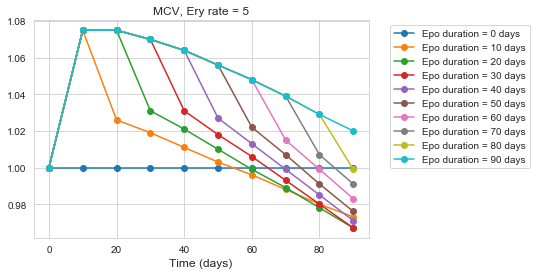

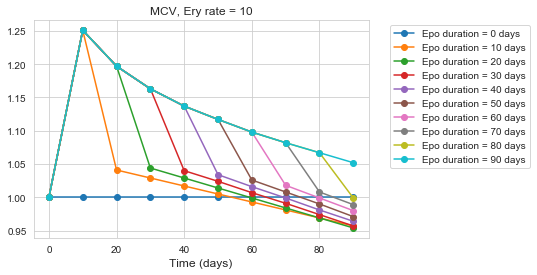

In [48]:
for f in fold_increase:
    MCV_dict, Retic_dict = time_course(f, distribution_plot=False, RClife = 95)

    fig, ax = plt.subplots()
    for eday in MCV_dict.keys():
        y = MCV_dict[eday]
        x = [i for i in range(0,100, 10)]

        ax.plot(x, y, marker= 'o', label = 'Epo duration = '+ str(eday)+' days')
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.title('MCV, Ery rate = '+ str(f))
        plt.xlabel('Time (days)', fontsize = 12)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


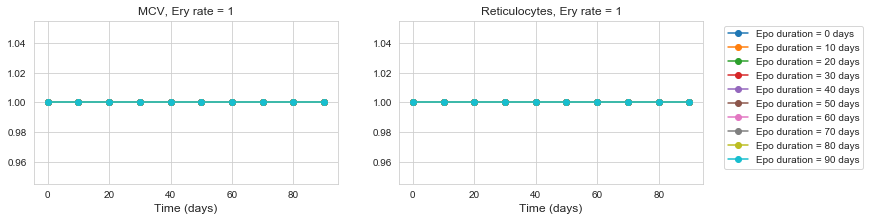

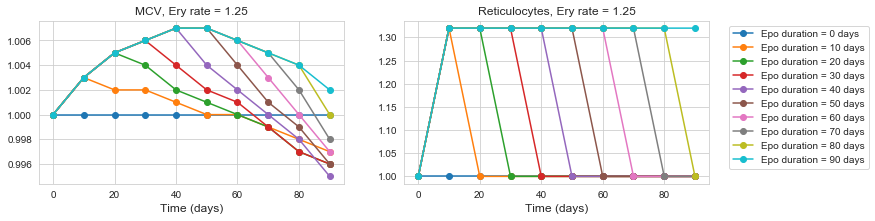

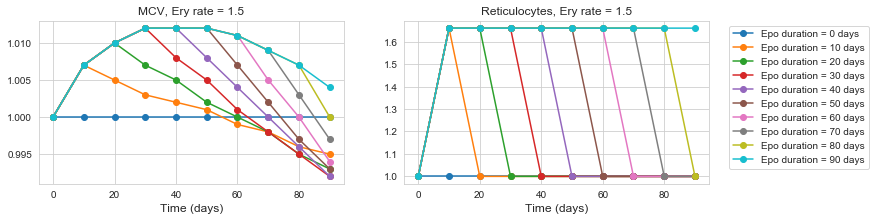

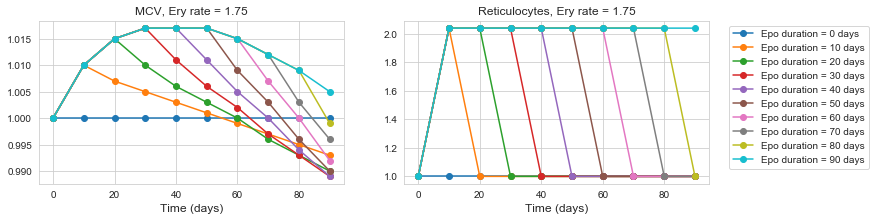

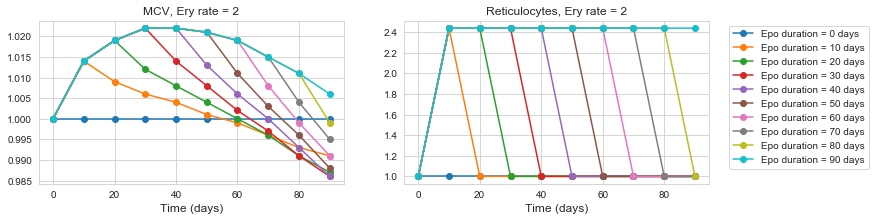

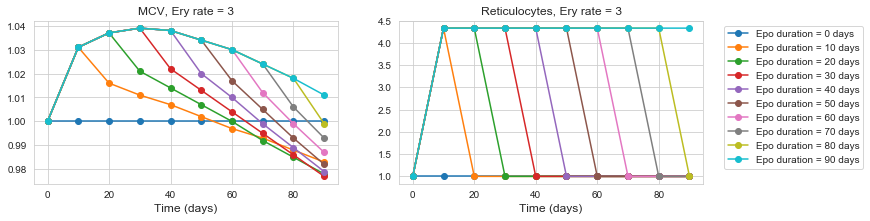

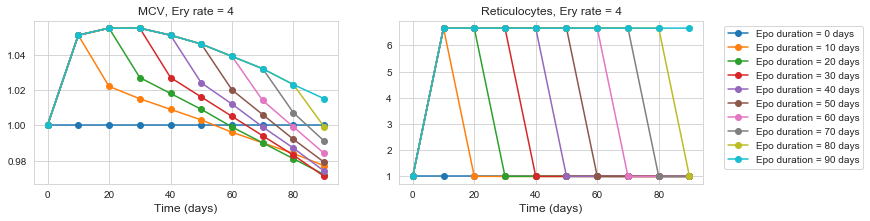

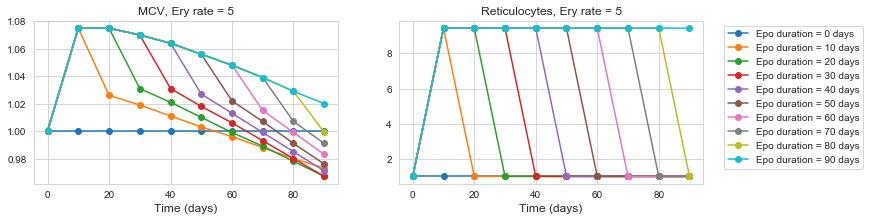

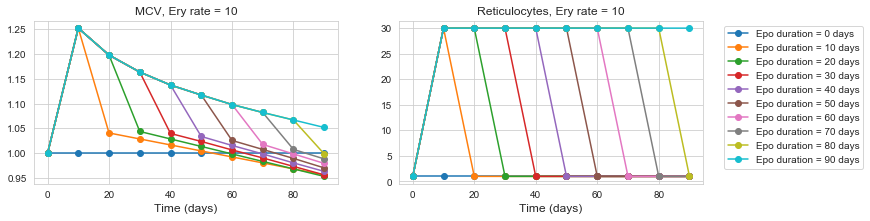

In [41]:
for f in fold_increase:
    MCV_dict, Retic_dict = time_course(f, distribution_plot=False, RClife = 95)

    fig, ax = plt.subplots(1,2, figsize = (12,3))
    for eday in MCV_dict.keys():
        y1 = MCV_dict[eday]
        y2 = Retic_dict[eday]
        x = [i for i in range(0,100, 10)]
        
        plt.subplot(1,2,1)
        plt.plot(x, y1, marker= 'o')
        plt.title('MCV, Ery rate = '+ str(f))
        plt.xlabel('Time (days)', fontsize = 12)
   
        
        plt.subplot(1,2,2)
        plt.plot(x, y2, marker= 'o', label = 'Epo duration = '+ str(eday)+' days')
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.title('Reticulocytes, Ery rate = '+ str(f))
        plt.xlabel('Time (days)', fontsize = 12)

In [49]:
fold_increase = [1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 10]
fold_increase_1 = fold_increase

In [50]:
fold_increase = fold_increase_1[1:5]
fold_increase

[1.25, 1.5, 1.75, 2]

In [51]:
Eday_list = [day for day in range(0, 100, 10)]
for j, eday in enumerate(Eday_list):
    print(2*j+1, 2*j+2, eday)
Eday_list, len(Eday_list)

1 2 0
3 4 10
5 6 20
7 8 30
9 10 40
11 12 50
13 14 60
15 16 70
17 18 80
19 20 90


([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], 10)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


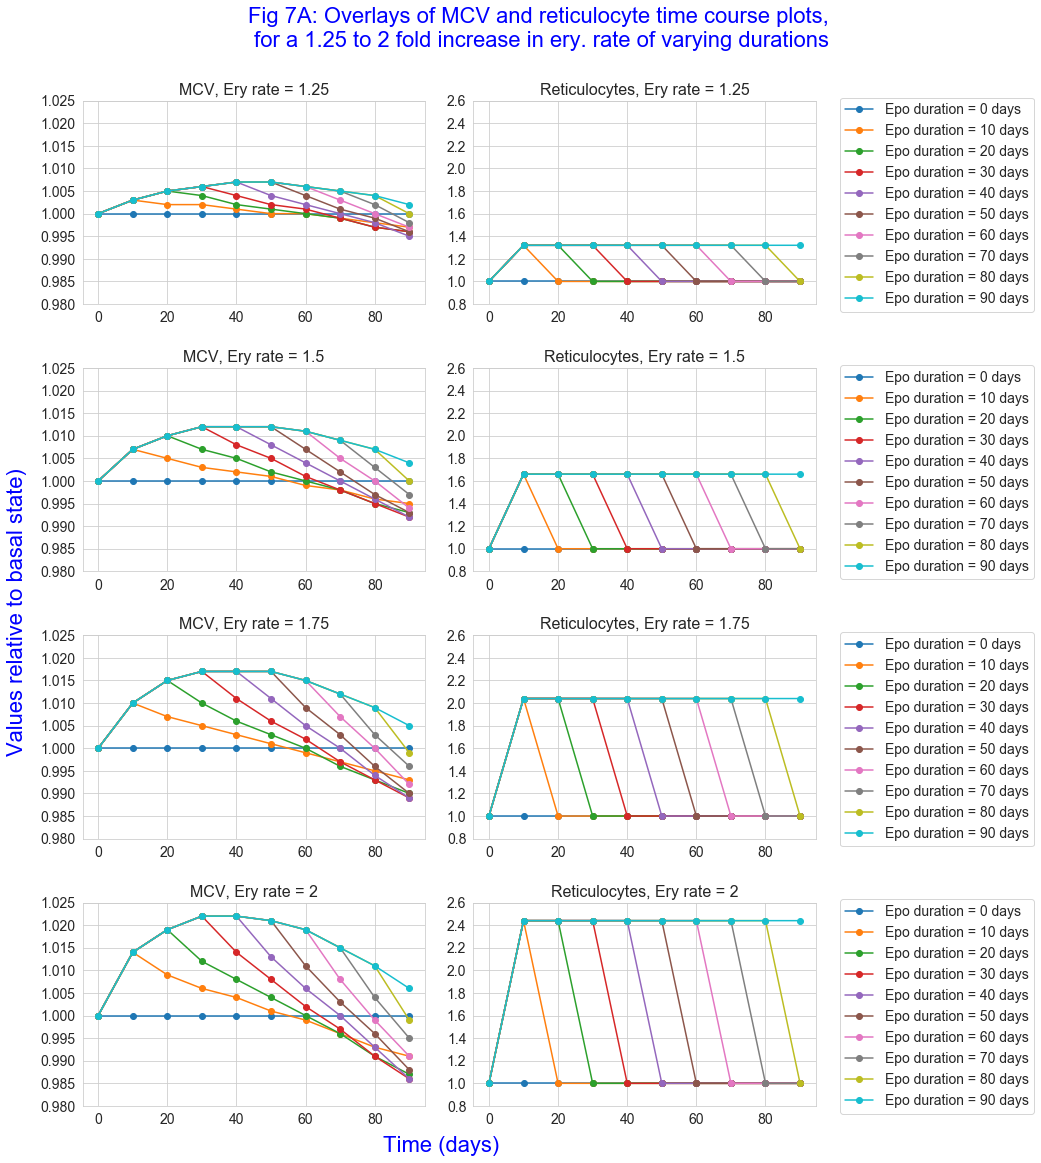

In [52]:
nrows = len(fold_increase)
fig, ax = plt.subplots(nrows = nrows,ncols = 2,sharex = True, sharey= True, figsize = (14,15))

for j,f in enumerate(fold_increase):
    MCV_dict, Retic_dict = time_course(f, distribution_plot=False, RClife = 95)
    
    for eday in Eday_list:
        
        y1 = MCV_dict[eday]
        y2 = Retic_dict[eday]
        x = Eday_list
        
        plt.subplot(nrows,2,2*j+1)
        plt.plot(x, y1, marker= 'o')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.title('MCV, Ery rate = '+ str(f),fontsize = 16)
        plt.ylim(0.980,1.025)
        
        
        plt.subplot(nrows,2,2*j+2)
        plt.plot(x, y2, marker= 'o', label = 'Epo duration = '+ str(eday)+' days')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        legend = plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', fontsize = 14)
        plt.title('Reticulocytes, Ery rate = '+ str(f), fontsize = 16)
        plt.ylim(0.80, 2.6)
       
#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#ylabel = plt.ylabel('Values relative to basal state)', fontsize = 20, color = 'blue')
#xlabel = plt.xlabel('Time (days)', fontsize = 20, color = 'blue')
xlabel = fig.text(0.40, 0, 'Time (days)', ha='center',fontsize = 22, color = 'blue')
ylabel = fig.text(-0.03, 0.5, 'Values relative to basal state)', va='center', 
         rotation='vertical',fontsize = 22, color = 'blue')

suptitle = plt.suptitle('''Fig 7A: Overlays of MCV and reticulocyte time course plots, 
for a 1.25 to 2 fold increase in ery. rate of varying durations''', 
                        fontsize = 22, color = 'blue', y = 1.06)
fig.tight_layout()
plt.savefig('Figures/RClife95/MCV and Retic time course LowEryRates_sameY.pdf',
           bbox_extra_artists=(suptitle, legend,xlabel, ylabel), bbox_inches="tight")    

In [53]:
fold_increase = fold_increase_1[5:]
fold_increase

[3, 4, 5, 10]

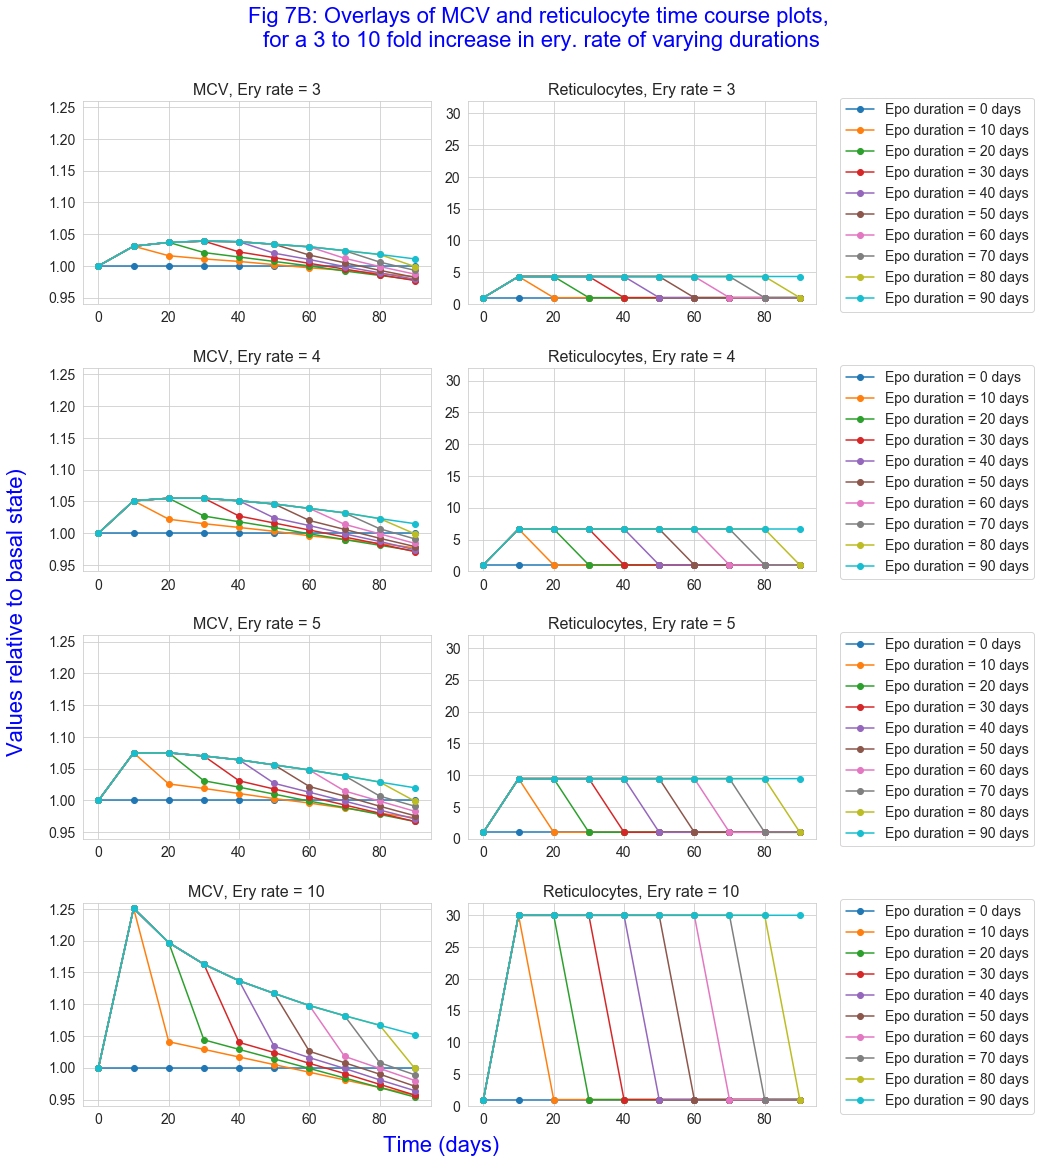

In [54]:
nrows = len(fold_increase)
fig, ax = plt.subplots(nrows = nrows,ncols = 2,sharex = True, sharey= True, figsize = (14,15))

for j,f in enumerate(fold_increase):
    MCV_dict, Retic_dict = time_course(f, distribution_plot=False, RClife = 95)
    
    for eday in Eday_list:
        
        y1 = MCV_dict[eday]
        y2 = Retic_dict[eday]
        x = Eday_list
        
        plt.subplot(nrows,2,2*j+1)
        plt.plot(x, y1, marker= 'o')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.title('MCV, Ery rate = '+ str(f),fontsize = 16)
        plt.ylim(0.94,1.26)
        
        
        plt.subplot(nrows,2,2*j+2)
        plt.plot(x, y2, marker= 'o', label = 'Epo duration = '+ str(eday)+' days')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        legend = plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', fontsize = 14)
        plt.title('Reticulocytes, Ery rate = '+ str(f), fontsize = 16)
        plt.ylim(0,32)
       
#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#ylabel = plt.ylabel('Values relative to basal state)', fontsize = 20, color = 'blue')
#xlabel = plt.xlabel('Time (days)', fontsize = 20, color = 'blue')
xlabel = fig.text(0.40, 0, 'Time (days)', ha='center',fontsize = 22, color = 'blue')
ylabel = fig.text(-0.03, 0.5, 'Values relative to basal state)', va='center', 
         rotation='vertical',fontsize = 22, color = 'blue')

suptitle = plt.suptitle('''Fig 7B: Overlays of MCV and reticulocyte time course plots, 
for a 3 to 10 fold increase in ery. rate of varying durations''', 
                        fontsize = 22, color = 'blue', y = 1.06)
fig.tight_layout()
plt.savefig('Figures/RClife95/MCV and Retic time course HighEryRates_sameY.pdf',
           bbox_extra_artists=(suptitle, legend,xlabel, ylabel), bbox_inches="tight")    

## 7. Examining the effect of retics dropping below baseline following Epo treatment

In [55]:
# Generate list of Epo treatment for 20 days, dpost-treatment days with retic count reduced by
#25%, as a list of (x,z) tuples:
Eday_list = [day for day in range(0, 80, 10)] # list of days of Epo treatment

treat_dict = {}
eday = 50
for eday in Eday_list:
    treat_list = []

    for i in Eday_list:
        if i<= eday:
            treat_list.append((i, 0))
        else:
            treat_list.append((eday, i-eday))
    treat_dict[eday] = treat_list
print(treat_dict)

{0: [(0, 0), (0, 10), (0, 20), (0, 30), (0, 40), (0, 50), (0, 60), (0, 70)], 10: [(0, 0), (10, 0), (10, 10), (10, 20), (10, 30), (10, 40), (10, 50), (10, 60)], 20: [(0, 0), (10, 0), (20, 0), (20, 10), (20, 20), (20, 30), (20, 40), (20, 50)], 30: [(0, 0), (10, 0), (20, 0), (30, 0), (30, 10), (30, 20), (30, 30), (30, 40)], 40: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (40, 10), (40, 20), (40, 30)], 50: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (50, 10), (50, 20)], 60: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (60, 0), (60, 10)], 70: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (60, 0), (70, 0)]}


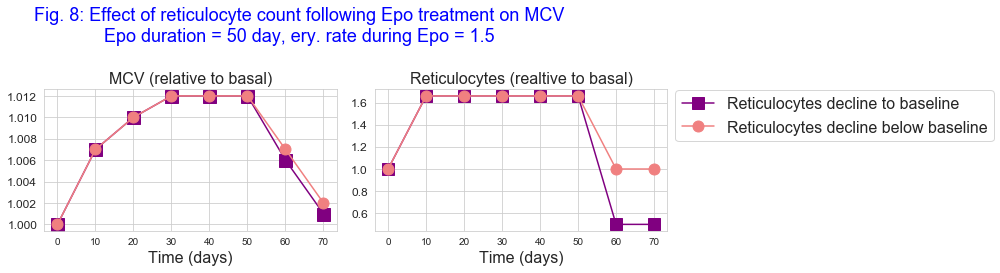

In [56]:
treat_dict = { 50: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (50, 10), (50, 20)]}

f = 1.5
MCV_dict1, Retic_dict1 = time_course(f, OneTimeCourse = True,treat_dict = treat_dict,  zf = 0.5, RClife = 95)
MCV_dict2, Retic_dict2 = time_course(f, OneTimeCourse = True,treat_dict = treat_dict,  zf = 1, RClife = 95)
fig, ax = plt.subplots(1,2, figsize = (14,3))
sns.set_style('whitegrid')
for eday in MCV_dict1.keys():
    y1 = MCV_dict1[eday]
    yr1 = Retic_dict1[eday]
    x = [i for i in range(0, 80, 10)]
    
    y2 = MCV_dict2[eday]
    yr2 = Retic_dict2[eday]
    
        
    plt.subplot(1,2,1)
    plt.plot(x, y1, marker= 's', markersize = 13, color = 'purple')
    plt.plot(x, y2, marker= 'o',markersize = 11, color = 'lightcoral')
    plt.title('MCV (relative to basal)', fontsize = 16)
    plt.xlabel('Time (days)', fontsize = 16)
    plt.yticks(fontsize = 12)
        
    plt.subplot(1,2,2)
    plt.plot(x, yr1, marker= 's', markersize = 12, color = 'purple', label = "Reticulocytes decline to baseline")
    plt.plot(x, yr2, marker= 'o', markersize = 11, color = 'lightcoral', label = "Reticulocytes decline below baseline")
    legend = plt.legend(bbox_to_anchor=(1, 1.05), fontsize = 16)
    plt.title('Reticulocytes (realtive to basal)', fontsize = 16)
    plt.xlabel('Time (days)', fontsize = 16)
    plt.yticks(fontsize = 12)
suptitle = fig.suptitle('''Fig. 8: Effect of reticulocyte count following Epo treatment on MCV
Epo duration = 50 day, ery. rate during Epo = 1.5''', color = 'blue', fontsize = 18, 
                       x = 0.3, y= 1.25)
fig.tight_layout()

fig.savefig('Figures/RClife95/ReticsPostTreat.pdf', 
            bbox_extra_artists=(suptitle, legend,), bbox_inches="tight")
    
    

## 8. Simulating human intervention study #2 (Jules)

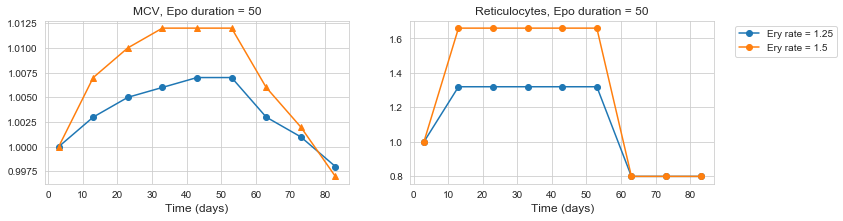

In [57]:
treat_dict = { 50: [(0, 0), (10, 0), (20, 0), (30, 0), (40, 0), (50, 0), (50, 10), (50, 20), (50, 30)]}

f1= 1.25  # lower bound simulation
f2 = 1.5  # upper bound simulation
MCV_dict1, Retic_dict1 = time_course(f1, OneTimeCourse = True,treat_dict = treat_dict,  zf = 0.8, RClife= 95 )
MCV_dict2, Retic_dict2 = time_course(f2, OneTimeCourse = True,treat_dict = treat_dict,  zf = 0.8, RClife = 95)
fig, ax = plt.subplots(1,2, figsize = (12,3))

for eday in MCV_dict1.keys():
    y1 = MCV_dict1[eday]
    yr1 = Retic_dict1[eday]
    x = [i+3 for i in range(0, 90, 10)]
    
    y2 = MCV_dict2[eday]
    yr2 = Retic_dict2[eday]
    
        
    plt.subplot(1,2,1)
    plt.plot(x, y1, marker= 'o')
    plt.plot(x, y2, marker= '^')
    plt.title('MCV, Epo duration = '+ str(eday))
    plt.xlabel('Time (days)', fontsize = 12)
        
    plt.subplot(1,2,2)
    plt.plot(x, yr1, marker= 'o', label = 'Ery rate = '+ str(f1))
    plt.plot(x, yr2, marker= 'o', label = 'Ery rate = '+ str(f2))
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title('Reticulocytes, Epo duration = '+ str(eday))
    plt.xlabel('Time (days)', fontsize = 12)

In [58]:
MCV_dict1

{50: [1.0, 1.003, 1.005, 1.006, 1.007, 1.007, 1.003, 1.001, 0.998]}

In [59]:
MCV_dict2

{50: [1.0, 1.007, 1.01, 1.012, 1.012, 1.012, 1.006, 1.002, 0.997]}

In [60]:
Retic_dict1

{50: [1.0, 1.32, 1.32, 1.32, 1.32, 1.32, 0.8, 0.8, 0.8]}

In [61]:
Retic_dict2

{50: [1.0, 1.66, 1.66, 1.66, 1.66, 1.66, 0.8, 0.8, 0.8]}

## 9. Simulating human intervention study #1 (Jacob)

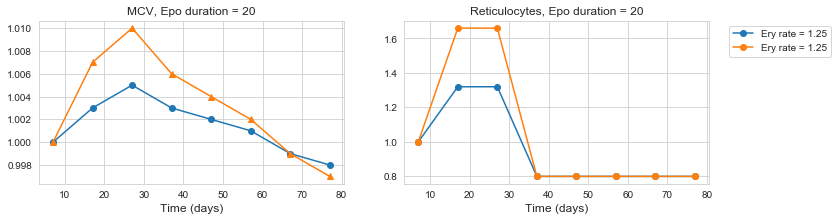

In [62]:
treat_dict = { 20: [(0, 0), (10, 0), (20, 0), (20, 10), (20, 20), (20, 30), (20, 40), (20, 50)]}

f1= 1.25
f2 = 1.5
MCV_dict1, Retic_dict1 = time_course(f1, OneTimeCourse = True,treat_dict = treat_dict,  zf = 0.8, RClife = 95)
MCV_dict2, Retic_dict2 = time_course(f2, OneTimeCourse = True,treat_dict = treat_dict,  zf = 0.8, RClife = 95)
fig, ax = plt.subplots(1,2, figsize = (12,3))

for eday in MCV_dict1.keys():
    y1 = MCV_dict1[eday]
    yr1 = Retic_dict1[eday]
    x = [i+7 for i in range(0, 80, 10)]
    
    y2 = MCV_dict2[eday]
    yr2 = Retic_dict2[eday]
    
        
    plt.subplot(1,2,1)
    plt.plot(x, y1, marker= 'o')
    plt.plot(x, y2, marker= '^')
    plt.title('MCV, Epo duration = '+ str(eday))
    plt.xlabel('Time (days)', fontsize = 12)
        
    plt.subplot(1,2,2)
    plt.plot(x, yr1, marker= 'o', label = 'Ery rate = '+ str(f1))
    plt.plot(x, yr2, marker= 'o', label = 'Ery rate = '+ str(f1))
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title('Reticulocytes, Epo duration = '+ str(eday))
    plt.xlabel('Time (days)', fontsize = 12)

In [63]:
MCV_dict1

{20: [1.0, 1.003, 1.005, 1.003, 1.002, 1.001, 0.999, 0.998]}

In [64]:
MCV_dict2

{20: [1.0, 1.007, 1.01, 1.006, 1.004, 1.002, 0.999, 0.997]}

In [65]:
Retic_dict1

{20: [1.0, 1.32, 1.32, 0.8, 0.8, 0.8, 0.8, 0.8]}

In [66]:
Retic_dict2

{20: [1.0, 1.66, 1.66, 0.8, 0.8, 0.8, 0.8, 0.8]}